# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (Check inside your classroom for a discount code)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem" (this lesson)

- [Curate a Dataset](#lesson_1)
- [Developing a "Predictive Theory"](#lesson_2)
- [**PROJECT 1**: Quick Theory Validation](#project_1)


- [Transforming Text to Numbers](#lesson_3)
- [**PROJECT 2**: Creating the Input/Output Data](#project_2)


- Putting it all together in a Neural Network (video only - nothing in notebook)
- [**PROJECT 3**: Building our Neural Network](#project_3)


- [Understanding Neural Noise](#lesson_4)
- [**PROJECT 4**: Making Learning Faster by Reducing Noise](#project_4)


- [Analyzing Inefficiencies in our Network](#lesson_5)
- [**PROJECT 5**: Making our Network Train and Run Faster](#project_5)


- [Further Noise Reduction](#lesson_6)
- [**PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary](#project_6)


- [Analysis: What's going on in the weights?](#lesson_7)

# Lesson: Curate a Dataset<a id='lesson_1'></a>
The cells from here until Project 1 include code Andrew shows in the videos leading up to mini project 1. We've included them so you can run the code along with the videos without having to type in everything.

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation<a id='project_1'></a>

There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hints and starter code throughout this notebook.

You'll find the [Counter](https://docs.python.org/2/library/collections.html#collections.Counter) class to be useful in this exercise, as well as the [numpy](https://docs.scipy.org/doc/numpy/reference/) library.

In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [14]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.

**Note:** Throughout these projects, you should use `split(' ')` to divide a piece of text (such as a review) into individual words. If you use `split()` instead, you'll get slightly different results than what the videos and solutions show.

In [15]:
# TODO: Loop over all the words in all the reviews and increment the counts in the appropriate counter objects

for idx in range(len(reviews)):
    words = reviews[idx].split(' ')
    total_counts.update(words)
    if(labels[idx] == 'POSITIVE'):
        #print("index: ",idx,"label: ",labels[idx])
        positive_counts.update(words)
    else:
        #print("index: ",idx,"label: ",labels[idx])
        negative_counts.update(words)


index:  0 label:  POSITIVE
index:  1 label:  NEGATIVE
index:  2 label:  POSITIVE
index:  3 label:  NEGATIVE
index:  4 label:  POSITIVE
index:  5 label:  NEGATIVE
index:  6 label:  POSITIVE
index:  7 label:  NEGATIVE
index:  8 label:  POSITIVE
index:  9 label:  NEGATIVE
index:  10 label:  POSITIVE
index:  11 label:  NEGATIVE
index:  12 label:  POSITIVE
index:  13 label:  NEGATIVE
index:  14 label:  POSITIVE
index:  15 label:  NEGATIVE
index:  16 label:  POSITIVE
index:  17 label:  NEGATIVE
index:  18 label:  POSITIVE
index:  19 label:  NEGATIVE
index:  20 label:  POSITIVE
index:  21 label:  NEGATIVE
index:  22 label:  POSITIVE
index:  23 label:  NEGATIVE
index:  24 label:  POSITIVE
index:  25 label:  NEGATIVE
index:  26 label:  POSITIVE
index:  27 label:  NEGATIVE
index:  28 label:  POSITIVE
index:  29 label:  NEGATIVE
index:  30 label:  POSITIVE
index:  31 label:  NEGATIVE
index:  32 label:  POSITIVE
index:  33 label:  NEGATIVE
index:  34 label:  POSITIVE
index:  35 label:  NEGATIVE
in

index:  446 label:  POSITIVE
index:  447 label:  NEGATIVE
index:  448 label:  POSITIVE
index:  449 label:  NEGATIVE
index:  450 label:  POSITIVE
index:  451 label:  NEGATIVE
index:  452 label:  POSITIVE
index:  453 label:  NEGATIVE
index:  454 label:  POSITIVE
index:  455 label:  NEGATIVE
index:  456 label:  POSITIVE
index:  457 label:  NEGATIVE
index:  458 label:  POSITIVE
index:  459 label:  NEGATIVE
index:  460 label:  POSITIVE
index:  461 label:  NEGATIVE
index:  462 label:  POSITIVE
index:  463 label:  NEGATIVE
index:  464 label:  POSITIVE
index:  465 label:  NEGATIVE
index:  466 label:  POSITIVE
index:  467 label:  NEGATIVE
index:  468 label:  POSITIVE
index:  469 label:  NEGATIVE
index:  470 label:  POSITIVE
index:  471 label:  NEGATIVE
index:  472 label:  POSITIVE
index:  473 label:  NEGATIVE
index:  474 label:  POSITIVE
index:  475 label:  NEGATIVE
index:  476 label:  POSITIVE
index:  477 label:  NEGATIVE
index:  478 label:  POSITIVE
index:  479 label:  NEGATIVE
index:  480 la

index:  821 label:  NEGATIVE
index:  822 label:  POSITIVE
index:  823 label:  NEGATIVE
index:  824 label:  POSITIVE
index:  825 label:  NEGATIVE
index:  826 label:  POSITIVE
index:  827 label:  NEGATIVE
index:  828 label:  POSITIVE
index:  829 label:  NEGATIVE
index:  830 label:  POSITIVE
index:  831 label:  NEGATIVE
index:  832 label:  POSITIVE
index:  833 label:  NEGATIVE
index:  834 label:  POSITIVE
index:  835 label:  NEGATIVE
index:  836 label:  POSITIVE
index:  837 label:  NEGATIVE
index:  838 label:  POSITIVE
index:  839 label:  NEGATIVE
index:  840 label:  POSITIVE
index:  841 label:  NEGATIVE
index:  842 label:  POSITIVE
index:  843 label:  NEGATIVE
index:  844 label:  POSITIVE
index:  845 label:  NEGATIVE
index:  846 label:  POSITIVE
index:  847 label:  NEGATIVE
index:  848 label:  POSITIVE
index:  849 label:  NEGATIVE
index:  850 label:  POSITIVE
index:  851 label:  NEGATIVE
index:  852 label:  POSITIVE
index:  853 label:  NEGATIVE
index:  854 label:  POSITIVE
index:  855 la

index:  1183 label:  NEGATIVE
index:  1184 label:  POSITIVE
index:  1185 label:  NEGATIVE
index:  1186 label:  POSITIVE
index:  1187 label:  NEGATIVE
index:  1188 label:  POSITIVE
index:  1189 label:  NEGATIVE
index:  1190 label:  POSITIVE
index:  1191 label:  NEGATIVE
index:  1192 label:  POSITIVE
index:  1193 label:  NEGATIVE
index:  1194 label:  POSITIVE
index:  1195 label:  NEGATIVE
index:  1196 label:  POSITIVE
index:  1197 label:  NEGATIVE
index:  1198 label:  POSITIVE
index:  1199 label:  NEGATIVE
index:  1200 label:  POSITIVE
index:  1201 label:  NEGATIVE
index:  1202 label:  POSITIVE
index:  1203 label:  NEGATIVE
index:  1204 label:  POSITIVE
index:  1205 label:  NEGATIVE
index:  1206 label:  POSITIVE
index:  1207 label:  NEGATIVE
index:  1208 label:  POSITIVE
index:  1209 label:  NEGATIVE
index:  1210 label:  POSITIVE
index:  1211 label:  NEGATIVE
index:  1212 label:  POSITIVE
index:  1213 label:  NEGATIVE
index:  1214 label:  POSITIVE
index:  1215 label:  NEGATIVE
index:  12

index:  1493 label:  NEGATIVE
index:  1494 label:  POSITIVE
index:  1495 label:  NEGATIVE
index:  1496 label:  POSITIVE
index:  1497 label:  NEGATIVE
index:  1498 label:  POSITIVE
index:  1499 label:  NEGATIVE
index:  1500 label:  POSITIVE
index:  1501 label:  NEGATIVE
index:  1502 label:  POSITIVE
index:  1503 label:  NEGATIVE
index:  1504 label:  POSITIVE
index:  1505 label:  NEGATIVE
index:  1506 label:  POSITIVE
index:  1507 label:  NEGATIVE
index:  1508 label:  POSITIVE
index:  1509 label:  NEGATIVE
index:  1510 label:  POSITIVE
index:  1511 label:  NEGATIVE
index:  1512 label:  POSITIVE
index:  1513 label:  NEGATIVE
index:  1514 label:  POSITIVE
index:  1515 label:  NEGATIVE
index:  1516 label:  POSITIVE
index:  1517 label:  NEGATIVE
index:  1518 label:  POSITIVE
index:  1519 label:  NEGATIVE
index:  1520 label:  POSITIVE
index:  1521 label:  NEGATIVE
index:  1522 label:  POSITIVE
index:  1523 label:  NEGATIVE
index:  1524 label:  POSITIVE
index:  1525 label:  NEGATIVE
index:  15

index:  1848 label:  POSITIVE
index:  1849 label:  NEGATIVE
index:  1850 label:  POSITIVE
index:  1851 label:  NEGATIVE
index:  1852 label:  POSITIVE
index:  1853 label:  NEGATIVE
index:  1854 label:  POSITIVE
index:  1855 label:  NEGATIVE
index:  1856 label:  POSITIVE
index:  1857 label:  NEGATIVE
index:  1858 label:  POSITIVE
index:  1859 label:  NEGATIVE
index:  1860 label:  POSITIVE
index:  1861 label:  NEGATIVE
index:  1862 label:  POSITIVE
index:  1863 label:  NEGATIVE
index:  1864 label:  POSITIVE
index:  1865 label:  NEGATIVE
index:  1866 label:  POSITIVE
index:  1867 label:  NEGATIVE
index:  1868 label:  POSITIVE
index:  1869 label:  NEGATIVE
index:  1870 label:  POSITIVE
index:  1871 label:  NEGATIVE
index:  1872 label:  POSITIVE
index:  1873 label:  NEGATIVE
index:  1874 label:  POSITIVE
index:  1875 label:  NEGATIVE
index:  1876 label:  POSITIVE
index:  1877 label:  NEGATIVE
index:  1878 label:  POSITIVE
index:  1879 label:  NEGATIVE
index:  1880 label:  POSITIVE
index:  18

index:  2226 label:  POSITIVE
index:  2227 label:  NEGATIVE
index:  2228 label:  POSITIVE
index:  2229 label:  NEGATIVE
index:  2230 label:  POSITIVE
index:  2231 label:  NEGATIVE
index:  2232 label:  POSITIVE
index:  2233 label:  NEGATIVE
index:  2234 label:  POSITIVE
index:  2235 label:  NEGATIVE
index:  2236 label:  POSITIVE
index:  2237 label:  NEGATIVE
index:  2238 label:  POSITIVE
index:  2239 label:  NEGATIVE
index:  2240 label:  POSITIVE
index:  2241 label:  NEGATIVE
index:  2242 label:  POSITIVE
index:  2243 label:  NEGATIVE
index:  2244 label:  POSITIVE
index:  2245 label:  NEGATIVE
index:  2246 label:  POSITIVE
index:  2247 label:  NEGATIVE
index:  2248 label:  POSITIVE
index:  2249 label:  NEGATIVE
index:  2250 label:  POSITIVE
index:  2251 label:  NEGATIVE
index:  2252 label:  POSITIVE
index:  2253 label:  NEGATIVE
index:  2254 label:  POSITIVE
index:  2255 label:  NEGATIVE
index:  2256 label:  POSITIVE
index:  2257 label:  NEGATIVE
index:  2258 label:  POSITIVE
index:  22

index:  2570 label:  POSITIVE
index:  2571 label:  NEGATIVE
index:  2572 label:  POSITIVE
index:  2573 label:  NEGATIVE
index:  2574 label:  POSITIVE
index:  2575 label:  NEGATIVE
index:  2576 label:  POSITIVE
index:  2577 label:  NEGATIVE
index:  2578 label:  POSITIVE
index:  2579 label:  NEGATIVE
index:  2580 label:  POSITIVE
index:  2581 label:  NEGATIVE
index:  2582 label:  POSITIVE
index:  2583 label:  NEGATIVE
index:  2584 label:  POSITIVE
index:  2585 label:  NEGATIVE
index:  2586 label:  POSITIVE
index:  2587 label:  NEGATIVE
index:  2588 label:  POSITIVE
index:  2589 label:  NEGATIVE
index:  2590 label:  POSITIVE
index:  2591 label:  NEGATIVE
index:  2592 label:  POSITIVE
index:  2593 label:  NEGATIVE
index:  2594 label:  POSITIVE
index:  2595 label:  NEGATIVE
index:  2596 label:  POSITIVE
index:  2597 label:  NEGATIVE
index:  2598 label:  POSITIVE
index:  2599 label:  NEGATIVE
index:  2600 label:  POSITIVE
index:  2601 label:  NEGATIVE
index:  2602 label:  POSITIVE
index:  26

index:  2945 label:  NEGATIVE
index:  2946 label:  POSITIVE
index:  2947 label:  NEGATIVE
index:  2948 label:  POSITIVE
index:  2949 label:  NEGATIVE
index:  2950 label:  POSITIVE
index:  2951 label:  NEGATIVE
index:  2952 label:  POSITIVE
index:  2953 label:  NEGATIVE
index:  2954 label:  POSITIVE
index:  2955 label:  NEGATIVE
index:  2956 label:  POSITIVE
index:  2957 label:  NEGATIVE
index:  2958 label:  POSITIVE
index:  2959 label:  NEGATIVE
index:  2960 label:  POSITIVE
index:  2961 label:  NEGATIVE
index:  2962 label:  POSITIVE
index:  2963 label:  NEGATIVE
index:  2964 label:  POSITIVE
index:  2965 label:  NEGATIVE
index:  2966 label:  POSITIVE
index:  2967 label:  NEGATIVE
index:  2968 label:  POSITIVE
index:  2969 label:  NEGATIVE
index:  2970 label:  POSITIVE
index:  2971 label:  NEGATIVE
index:  2972 label:  POSITIVE
index:  2973 label:  NEGATIVE
index:  2974 label:  POSITIVE
index:  2975 label:  NEGATIVE
index:  2976 label:  POSITIVE
index:  2977 label:  NEGATIVE
index:  29

index:  3320 label:  POSITIVE
index:  3321 label:  NEGATIVE
index:  3322 label:  POSITIVE
index:  3323 label:  NEGATIVE
index:  3324 label:  POSITIVE
index:  3325 label:  NEGATIVE
index:  3326 label:  POSITIVE
index:  3327 label:  NEGATIVE
index:  3328 label:  POSITIVE
index:  3329 label:  NEGATIVE
index:  3330 label:  POSITIVE
index:  3331 label:  NEGATIVE
index:  3332 label:  POSITIVE
index:  3333 label:  NEGATIVE
index:  3334 label:  POSITIVE
index:  3335 label:  NEGATIVE
index:  3336 label:  POSITIVE
index:  3337 label:  NEGATIVE
index:  3338 label:  POSITIVE
index:  3339 label:  NEGATIVE
index:  3340 label:  POSITIVE
index:  3341 label:  NEGATIVE
index:  3342 label:  POSITIVE
index:  3343 label:  NEGATIVE
index:  3344 label:  POSITIVE
index:  3345 label:  NEGATIVE
index:  3346 label:  POSITIVE
index:  3347 label:  NEGATIVE
index:  3348 label:  POSITIVE
index:  3349 label:  NEGATIVE
index:  3350 label:  POSITIVE
index:  3351 label:  NEGATIVE
index:  3352 label:  POSITIVE
index:  33

index:  3945 label:  NEGATIVE
index:  3946 label:  POSITIVE
index:  3947 label:  NEGATIVE
index:  3948 label:  POSITIVE
index:  3949 label:  NEGATIVE
index:  3950 label:  POSITIVE
index:  3951 label:  NEGATIVE
index:  3952 label:  POSITIVE
index:  3953 label:  NEGATIVE
index:  3954 label:  POSITIVE
index:  3955 label:  NEGATIVE
index:  3956 label:  POSITIVE
index:  3957 label:  NEGATIVE
index:  3958 label:  POSITIVE
index:  3959 label:  NEGATIVE
index:  3960 label:  POSITIVE
index:  3961 label:  NEGATIVE
index:  3962 label:  POSITIVE
index:  3963 label:  NEGATIVE
index:  3964 label:  POSITIVE
index:  3965 label:  NEGATIVE
index:  3966 label:  POSITIVE
index:  3967 label:  NEGATIVE
index:  3968 label:  POSITIVE
index:  3969 label:  NEGATIVE
index:  3970 label:  POSITIVE
index:  3971 label:  NEGATIVE
index:  3972 label:  POSITIVE
index:  3973 label:  NEGATIVE
index:  3974 label:  POSITIVE
index:  3975 label:  NEGATIVE
index:  3976 label:  POSITIVE
index:  3977 label:  NEGATIVE
index:  39

index:  4320 label:  POSITIVE
index:  4321 label:  NEGATIVE
index:  4322 label:  POSITIVE
index:  4323 label:  NEGATIVE
index:  4324 label:  POSITIVE
index:  4325 label:  NEGATIVE
index:  4326 label:  POSITIVE
index:  4327 label:  NEGATIVE
index:  4328 label:  POSITIVE
index:  4329 label:  NEGATIVE
index:  4330 label:  POSITIVE
index:  4331 label:  NEGATIVE
index:  4332 label:  POSITIVE
index:  4333 label:  NEGATIVE
index:  4334 label:  POSITIVE
index:  4335 label:  NEGATIVE
index:  4336 label:  POSITIVE
index:  4337 label:  NEGATIVE
index:  4338 label:  POSITIVE
index:  4339 label:  NEGATIVE
index:  4340 label:  POSITIVE
index:  4341 label:  NEGATIVE
index:  4342 label:  POSITIVE
index:  4343 label:  NEGATIVE
index:  4344 label:  POSITIVE
index:  4345 label:  NEGATIVE
index:  4346 label:  POSITIVE
index:  4347 label:  NEGATIVE
index:  4348 label:  POSITIVE
index:  4349 label:  NEGATIVE
index:  4350 label:  POSITIVE
index:  4351 label:  NEGATIVE
index:  4352 label:  POSITIVE
index:  43

index:  4695 label:  NEGATIVE
index:  4696 label:  POSITIVE
index:  4697 label:  NEGATIVE
index:  4698 label:  POSITIVE
index:  4699 label:  NEGATIVE
index:  4700 label:  POSITIVE
index:  4701 label:  NEGATIVE
index:  4702 label:  POSITIVE
index:  4703 label:  NEGATIVE
index:  4704 label:  POSITIVE
index:  4705 label:  NEGATIVE
index:  4706 label:  POSITIVE
index:  4707 label:  NEGATIVE
index:  4708 label:  POSITIVE
index:  4709 label:  NEGATIVE
index:  4710 label:  POSITIVE
index:  4711 label:  NEGATIVE
index:  4712 label:  POSITIVE
index:  4713 label:  NEGATIVE
index:  4714 label:  POSITIVE
index:  4715 label:  NEGATIVE
index:  4716 label:  POSITIVE
index:  4717 label:  NEGATIVE
index:  4718 label:  POSITIVE
index:  4719 label:  NEGATIVE
index:  4720 label:  POSITIVE
index:  4721 label:  NEGATIVE
index:  4722 label:  POSITIVE
index:  4723 label:  NEGATIVE
index:  4724 label:  POSITIVE
index:  4725 label:  NEGATIVE
index:  4726 label:  POSITIVE
index:  4727 label:  NEGATIVE
index:  47

index:  5069 label:  NEGATIVE
index:  5070 label:  POSITIVE
index:  5071 label:  NEGATIVE
index:  5072 label:  POSITIVE
index:  5073 label:  NEGATIVE
index:  5074 label:  POSITIVE
index:  5075 label:  NEGATIVE
index:  5076 label:  POSITIVE
index:  5077 label:  NEGATIVE
index:  5078 label:  POSITIVE
index:  5079 label:  NEGATIVE
index:  5080 label:  POSITIVE
index:  5081 label:  NEGATIVE
index:  5082 label:  POSITIVE
index:  5083 label:  NEGATIVE
index:  5084 label:  POSITIVE
index:  5085 label:  NEGATIVE
index:  5086 label:  POSITIVE
index:  5087 label:  NEGATIVE
index:  5088 label:  POSITIVE
index:  5089 label:  NEGATIVE
index:  5090 label:  POSITIVE
index:  5091 label:  NEGATIVE
index:  5092 label:  POSITIVE
index:  5093 label:  NEGATIVE
index:  5094 label:  POSITIVE
index:  5095 label:  NEGATIVE
index:  5096 label:  POSITIVE
index:  5097 label:  NEGATIVE
index:  5098 label:  POSITIVE
index:  5099 label:  NEGATIVE
index:  5100 label:  POSITIVE
index:  5101 label:  NEGATIVE
index:  51

index:  5444 label:  POSITIVE
index:  5445 label:  NEGATIVE
index:  5446 label:  POSITIVE
index:  5447 label:  NEGATIVE
index:  5448 label:  POSITIVE
index:  5449 label:  NEGATIVE
index:  5450 label:  POSITIVE
index:  5451 label:  NEGATIVE
index:  5452 label:  POSITIVE
index:  5453 label:  NEGATIVE
index:  5454 label:  POSITIVE
index:  5455 label:  NEGATIVE
index:  5456 label:  POSITIVE
index:  5457 label:  NEGATIVE
index:  5458 label:  POSITIVE
index:  5459 label:  NEGATIVE
index:  5460 label:  POSITIVE
index:  5461 label:  NEGATIVE
index:  5462 label:  POSITIVE
index:  5463 label:  NEGATIVE
index:  5464 label:  POSITIVE
index:  5465 label:  NEGATIVE
index:  5466 label:  POSITIVE
index:  5467 label:  NEGATIVE
index:  5468 label:  POSITIVE
index:  5469 label:  NEGATIVE
index:  5470 label:  POSITIVE
index:  5471 label:  NEGATIVE
index:  5472 label:  POSITIVE
index:  5473 label:  NEGATIVE
index:  5474 label:  POSITIVE
index:  5475 label:  NEGATIVE
index:  5476 label:  POSITIVE
index:  54

index:  5813 label:  NEGATIVE
index:  5814 label:  POSITIVE
index:  5815 label:  NEGATIVE
index:  5816 label:  POSITIVE
index:  5817 label:  NEGATIVE
index:  5818 label:  POSITIVE
index:  5819 label:  NEGATIVE
index:  5820 label:  POSITIVE
index:  5821 label:  NEGATIVE
index:  5822 label:  POSITIVE
index:  5823 label:  NEGATIVE
index:  5824 label:  POSITIVE
index:  5825 label:  NEGATIVE
index:  5826 label:  POSITIVE
index:  5827 label:  NEGATIVE
index:  5828 label:  POSITIVE
index:  5829 label:  NEGATIVE
index:  5830 label:  POSITIVE
index:  5831 label:  NEGATIVE
index:  5832 label:  POSITIVE
index:  5833 label:  NEGATIVE
index:  5834 label:  POSITIVE
index:  5835 label:  NEGATIVE
index:  5836 label:  POSITIVE
index:  5837 label:  NEGATIVE
index:  5838 label:  POSITIVE
index:  5839 label:  NEGATIVE
index:  5840 label:  POSITIVE
index:  5841 label:  NEGATIVE
index:  5842 label:  POSITIVE
index:  5843 label:  NEGATIVE
index:  5844 label:  POSITIVE
index:  5845 label:  NEGATIVE
index:  58

index:  6438 label:  POSITIVE
index:  6439 label:  NEGATIVE
index:  6440 label:  POSITIVE
index:  6441 label:  NEGATIVE
index:  6442 label:  POSITIVE
index:  6443 label:  NEGATIVE
index:  6444 label:  POSITIVE
index:  6445 label:  NEGATIVE
index:  6446 label:  POSITIVE
index:  6447 label:  NEGATIVE
index:  6448 label:  POSITIVE
index:  6449 label:  NEGATIVE
index:  6450 label:  POSITIVE
index:  6451 label:  NEGATIVE
index:  6452 label:  POSITIVE
index:  6453 label:  NEGATIVE
index:  6454 label:  POSITIVE
index:  6455 label:  NEGATIVE
index:  6456 label:  POSITIVE
index:  6457 label:  NEGATIVE
index:  6458 label:  POSITIVE
index:  6459 label:  NEGATIVE
index:  6460 label:  POSITIVE
index:  6461 label:  NEGATIVE
index:  6462 label:  POSITIVE
index:  6463 label:  NEGATIVE
index:  6464 label:  POSITIVE
index:  6465 label:  NEGATIVE
index:  6466 label:  POSITIVE
index:  6467 label:  NEGATIVE
index:  6468 label:  POSITIVE
index:  6469 label:  NEGATIVE
index:  6470 label:  POSITIVE
index:  64

index:  6743 label:  NEGATIVE
index:  6744 label:  POSITIVE
index:  6745 label:  NEGATIVE
index:  6746 label:  POSITIVE
index:  6747 label:  NEGATIVE
index:  6748 label:  POSITIVE
index:  6749 label:  NEGATIVE
index:  6750 label:  POSITIVE
index:  6751 label:  NEGATIVE
index:  6752 label:  POSITIVE
index:  6753 label:  NEGATIVE
index:  6754 label:  POSITIVE
index:  6755 label:  NEGATIVE
index:  6756 label:  POSITIVE
index:  6757 label:  NEGATIVE
index:  6758 label:  POSITIVE
index:  6759 label:  NEGATIVE
index:  6760 label:  POSITIVE
index:  6761 label:  NEGATIVE
index:  6762 label:  POSITIVE
index:  6763 label:  NEGATIVE
index:  6764 label:  POSITIVE
index:  6765 label:  NEGATIVE
index:  6766 label:  POSITIVE
index:  6767 label:  NEGATIVE
index:  6768 label:  POSITIVE
index:  6769 label:  NEGATIVE
index:  6770 label:  POSITIVE
index:  6771 label:  NEGATIVE
index:  6772 label:  POSITIVE
index:  6773 label:  NEGATIVE
index:  6774 label:  POSITIVE
index:  6775 label:  NEGATIVE
index:  67

index:  7069 label:  NEGATIVE
index:  7070 label:  POSITIVE
index:  7071 label:  NEGATIVE
index:  7072 label:  POSITIVE
index:  7073 label:  NEGATIVE
index:  7074 label:  POSITIVE
index:  7075 label:  NEGATIVE
index:  7076 label:  POSITIVE
index:  7077 label:  NEGATIVE
index:  7078 label:  POSITIVE
index:  7079 label:  NEGATIVE
index:  7080 label:  POSITIVE
index:  7081 label:  NEGATIVE
index:  7082 label:  POSITIVE
index:  7083 label:  NEGATIVE
index:  7084 label:  POSITIVE
index:  7085 label:  NEGATIVE
index:  7086 label:  POSITIVE
index:  7087 label:  NEGATIVE
index:  7088 label:  POSITIVE
index:  7089 label:  NEGATIVE
index:  7090 label:  POSITIVE
index:  7091 label:  NEGATIVE
index:  7092 label:  POSITIVE
index:  7093 label:  NEGATIVE
index:  7094 label:  POSITIVE
index:  7095 label:  NEGATIVE
index:  7096 label:  POSITIVE
index:  7097 label:  NEGATIVE
index:  7098 label:  POSITIVE
index:  7099 label:  NEGATIVE
index:  7100 label:  POSITIVE
index:  7101 label:  NEGATIVE
index:  71

index:  7420 label:  POSITIVE
index:  7421 label:  NEGATIVE
index:  7422 label:  POSITIVE
index:  7423 label:  NEGATIVE
index:  7424 label:  POSITIVE
index:  7425 label:  NEGATIVE
index:  7426 label:  POSITIVE
index:  7427 label:  NEGATIVE
index:  7428 label:  POSITIVE
index:  7429 label:  NEGATIVE
index:  7430 label:  POSITIVE
index:  7431 label:  NEGATIVE
index:  7432 label:  POSITIVE
index:  7433 label:  NEGATIVE
index:  7434 label:  POSITIVE
index:  7435 label:  NEGATIVE
index:  7436 label:  POSITIVE
index:  7437 label:  NEGATIVE
index:  7438 label:  POSITIVE
index:  7439 label:  NEGATIVE
index:  7440 label:  POSITIVE
index:  7441 label:  NEGATIVE
index:  7442 label:  POSITIVE
index:  7443 label:  NEGATIVE
index:  7444 label:  POSITIVE
index:  7445 label:  NEGATIVE
index:  7446 label:  POSITIVE
index:  7447 label:  NEGATIVE
index:  7448 label:  POSITIVE
index:  7449 label:  NEGATIVE
index:  7450 label:  POSITIVE
index:  7451 label:  NEGATIVE
index:  7452 label:  POSITIVE
index:  74

index:  7715 label:  NEGATIVE
index:  7716 label:  POSITIVE
index:  7717 label:  NEGATIVE
index:  7718 label:  POSITIVE
index:  7719 label:  NEGATIVE
index:  7720 label:  POSITIVE
index:  7721 label:  NEGATIVE
index:  7722 label:  POSITIVE
index:  7723 label:  NEGATIVE
index:  7724 label:  POSITIVE
index:  7725 label:  NEGATIVE
index:  7726 label:  POSITIVE
index:  7727 label:  NEGATIVE
index:  7728 label:  POSITIVE
index:  7729 label:  NEGATIVE
index:  7730 label:  POSITIVE
index:  7731 label:  NEGATIVE
index:  7732 label:  POSITIVE
index:  7733 label:  NEGATIVE
index:  7734 label:  POSITIVE
index:  7735 label:  NEGATIVE
index:  7736 label:  POSITIVE
index:  7737 label:  NEGATIVE
index:  7738 label:  POSITIVE
index:  7739 label:  NEGATIVE
index:  7740 label:  POSITIVE
index:  7741 label:  NEGATIVE
index:  7742 label:  POSITIVE
index:  7743 label:  NEGATIVE
index:  7744 label:  POSITIVE
index:  7745 label:  NEGATIVE
index:  7746 label:  POSITIVE
index:  7747 label:  NEGATIVE
index:  77

index:  8068 label:  POSITIVE
index:  8069 label:  NEGATIVE
index:  8070 label:  POSITIVE
index:  8071 label:  NEGATIVE
index:  8072 label:  POSITIVE
index:  8073 label:  NEGATIVE
index:  8074 label:  POSITIVE
index:  8075 label:  NEGATIVE
index:  8076 label:  POSITIVE
index:  8077 label:  NEGATIVE
index:  8078 label:  POSITIVE
index:  8079 label:  NEGATIVE
index:  8080 label:  POSITIVE
index:  8081 label:  NEGATIVE
index:  8082 label:  POSITIVE
index:  8083 label:  NEGATIVE
index:  8084 label:  POSITIVE
index:  8085 label:  NEGATIVE
index:  8086 label:  POSITIVE
index:  8087 label:  NEGATIVE
index:  8088 label:  POSITIVE
index:  8089 label:  NEGATIVE
index:  8090 label:  POSITIVE
index:  8091 label:  NEGATIVE
index:  8092 label:  POSITIVE
index:  8093 label:  NEGATIVE
index:  8094 label:  POSITIVE
index:  8095 label:  NEGATIVE
index:  8096 label:  POSITIVE
index:  8097 label:  NEGATIVE
index:  8098 label:  POSITIVE
index:  8099 label:  NEGATIVE
index:  8100 label:  POSITIVE
index:  81

index:  8443 label:  NEGATIVE
index:  8444 label:  POSITIVE
index:  8445 label:  NEGATIVE
index:  8446 label:  POSITIVE
index:  8447 label:  NEGATIVE
index:  8448 label:  POSITIVE
index:  8449 label:  NEGATIVE
index:  8450 label:  POSITIVE
index:  8451 label:  NEGATIVE
index:  8452 label:  POSITIVE
index:  8453 label:  NEGATIVE
index:  8454 label:  POSITIVE
index:  8455 label:  NEGATIVE
index:  8456 label:  POSITIVE
index:  8457 label:  NEGATIVE
index:  8458 label:  POSITIVE
index:  8459 label:  NEGATIVE
index:  8460 label:  POSITIVE
index:  8461 label:  NEGATIVE
index:  8462 label:  POSITIVE
index:  8463 label:  NEGATIVE
index:  8464 label:  POSITIVE
index:  8465 label:  NEGATIVE
index:  8466 label:  POSITIVE
index:  8467 label:  NEGATIVE
index:  8468 label:  POSITIVE
index:  8469 label:  NEGATIVE
index:  8470 label:  POSITIVE
index:  8471 label:  NEGATIVE
index:  8472 label:  POSITIVE
index:  8473 label:  NEGATIVE
index:  8474 label:  POSITIVE
index:  8475 label:  NEGATIVE
index:  84

index:  8802 label:  POSITIVE
index:  8803 label:  NEGATIVE
index:  8804 label:  POSITIVE
index:  8805 label:  NEGATIVE
index:  8806 label:  POSITIVE
index:  8807 label:  NEGATIVE
index:  8808 label:  POSITIVE
index:  8809 label:  NEGATIVE
index:  8810 label:  POSITIVE
index:  8811 label:  NEGATIVE
index:  8812 label:  POSITIVE
index:  8813 label:  NEGATIVE
index:  8814 label:  POSITIVE
index:  8815 label:  NEGATIVE
index:  8816 label:  POSITIVE
index:  8817 label:  NEGATIVE
index:  8818 label:  POSITIVE
index:  8819 label:  NEGATIVE
index:  8820 label:  POSITIVE
index:  8821 label:  NEGATIVE
index:  8822 label:  POSITIVE
index:  8823 label:  NEGATIVE
index:  8824 label:  POSITIVE
index:  8825 label:  NEGATIVE
index:  8826 label:  POSITIVE
index:  8827 label:  NEGATIVE
index:  8828 label:  POSITIVE
index:  8829 label:  NEGATIVE
index:  8830 label:  POSITIVE
index:  8831 label:  NEGATIVE
index:  8832 label:  POSITIVE
index:  8833 label:  NEGATIVE
index:  8834 label:  POSITIVE
index:  88

index:  9106 label:  POSITIVE
index:  9107 label:  NEGATIVE
index:  9108 label:  POSITIVE
index:  9109 label:  NEGATIVE
index:  9110 label:  POSITIVE
index:  9111 label:  NEGATIVE
index:  9112 label:  POSITIVE
index:  9113 label:  NEGATIVE
index:  9114 label:  POSITIVE
index:  9115 label:  NEGATIVE
index:  9116 label:  POSITIVE
index:  9117 label:  NEGATIVE
index:  9118 label:  POSITIVE
index:  9119 label:  NEGATIVE
index:  9120 label:  POSITIVE
index:  9121 label:  NEGATIVE
index:  9122 label:  POSITIVE
index:  9123 label:  NEGATIVE
index:  9124 label:  POSITIVE
index:  9125 label:  NEGATIVE
index:  9126 label:  POSITIVE
index:  9127 label:  NEGATIVE
index:  9128 label:  POSITIVE
index:  9129 label:  NEGATIVE
index:  9130 label:  POSITIVE
index:  9131 label:  NEGATIVE
index:  9132 label:  POSITIVE
index:  9133 label:  NEGATIVE
index:  9134 label:  POSITIVE
index:  9135 label:  NEGATIVE
index:  9136 label:  POSITIVE
index:  9137 label:  NEGATIVE
index:  9138 label:  POSITIVE
index:  91

index:  9443 label:  NEGATIVE
index:  9444 label:  POSITIVE
index:  9445 label:  NEGATIVE
index:  9446 label:  POSITIVE
index:  9447 label:  NEGATIVE
index:  9448 label:  POSITIVE
index:  9449 label:  NEGATIVE
index:  9450 label:  POSITIVE
index:  9451 label:  NEGATIVE
index:  9452 label:  POSITIVE
index:  9453 label:  NEGATIVE
index:  9454 label:  POSITIVE
index:  9455 label:  NEGATIVE
index:  9456 label:  POSITIVE
index:  9457 label:  NEGATIVE
index:  9458 label:  POSITIVE
index:  9459 label:  NEGATIVE
index:  9460 label:  POSITIVE
index:  9461 label:  NEGATIVE
index:  9462 label:  POSITIVE
index:  9463 label:  NEGATIVE
index:  9464 label:  POSITIVE
index:  9465 label:  NEGATIVE
index:  9466 label:  POSITIVE
index:  9467 label:  NEGATIVE
index:  9468 label:  POSITIVE
index:  9469 label:  NEGATIVE
index:  9470 label:  POSITIVE
index:  9471 label:  NEGATIVE
index:  9472 label:  POSITIVE
index:  9473 label:  NEGATIVE
index:  9474 label:  POSITIVE
index:  9475 label:  NEGATIVE
index:  94

index:  9818 label:  POSITIVE
index:  9819 label:  NEGATIVE
index:  9820 label:  POSITIVE
index:  9821 label:  NEGATIVE
index:  9822 label:  POSITIVE
index:  9823 label:  NEGATIVE
index:  9824 label:  POSITIVE
index:  9825 label:  NEGATIVE
index:  9826 label:  POSITIVE
index:  9827 label:  NEGATIVE
index:  9828 label:  POSITIVE
index:  9829 label:  NEGATIVE
index:  9830 label:  POSITIVE
index:  9831 label:  NEGATIVE
index:  9832 label:  POSITIVE
index:  9833 label:  NEGATIVE
index:  9834 label:  POSITIVE
index:  9835 label:  NEGATIVE
index:  9836 label:  POSITIVE
index:  9837 label:  NEGATIVE
index:  9838 label:  POSITIVE
index:  9839 label:  NEGATIVE
index:  9840 label:  POSITIVE
index:  9841 label:  NEGATIVE
index:  9842 label:  POSITIVE
index:  9843 label:  NEGATIVE
index:  9844 label:  POSITIVE
index:  9845 label:  NEGATIVE
index:  9846 label:  POSITIVE
index:  9847 label:  NEGATIVE
index:  9848 label:  POSITIVE
index:  9849 label:  NEGATIVE
index:  9850 label:  POSITIVE
index:  98

index:  10191 label:  NEGATIVE
index:  10192 label:  POSITIVE
index:  10193 label:  NEGATIVE
index:  10194 label:  POSITIVE
index:  10195 label:  NEGATIVE
index:  10196 label:  POSITIVE
index:  10197 label:  NEGATIVE
index:  10198 label:  POSITIVE
index:  10199 label:  NEGATIVE
index:  10200 label:  POSITIVE
index:  10201 label:  NEGATIVE
index:  10202 label:  POSITIVE
index:  10203 label:  NEGATIVE
index:  10204 label:  POSITIVE
index:  10205 label:  NEGATIVE
index:  10206 label:  POSITIVE
index:  10207 label:  NEGATIVE
index:  10208 label:  POSITIVE
index:  10209 label:  NEGATIVE
index:  10210 label:  POSITIVE
index:  10211 label:  NEGATIVE
index:  10212 label:  POSITIVE
index:  10213 label:  NEGATIVE
index:  10214 label:  POSITIVE
index:  10215 label:  NEGATIVE
index:  10216 label:  POSITIVE
index:  10217 label:  NEGATIVE
index:  10218 label:  POSITIVE
index:  10219 label:  NEGATIVE
index:  10220 label:  POSITIVE
index:  10221 label:  NEGATIVE
index:  10222 label:  POSITIVE
index:  

index:  10472 label:  POSITIVE
index:  10473 label:  NEGATIVE
index:  10474 label:  POSITIVE
index:  10475 label:  NEGATIVE
index:  10476 label:  POSITIVE
index:  10477 label:  NEGATIVE
index:  10478 label:  POSITIVE
index:  10479 label:  NEGATIVE
index:  10480 label:  POSITIVE
index:  10481 label:  NEGATIVE
index:  10482 label:  POSITIVE
index:  10483 label:  NEGATIVE
index:  10484 label:  POSITIVE
index:  10485 label:  NEGATIVE
index:  10486 label:  POSITIVE
index:  10487 label:  NEGATIVE
index:  10488 label:  POSITIVE
index:  10489 label:  NEGATIVE
index:  10490 label:  POSITIVE
index:  10491 label:  NEGATIVE
index:  10492 label:  POSITIVE
index:  10493 label:  NEGATIVE
index:  10494 label:  POSITIVE
index:  10495 label:  NEGATIVE
index:  10496 label:  POSITIVE
index:  10497 label:  NEGATIVE
index:  10498 label:  POSITIVE
index:  10499 label:  NEGATIVE
index:  10500 label:  POSITIVE
index:  10501 label:  NEGATIVE
index:  10502 label:  POSITIVE
index:  10503 label:  NEGATIVE
index:  

index:  10817 label:  NEGATIVE
index:  10818 label:  POSITIVE
index:  10819 label:  NEGATIVE
index:  10820 label:  POSITIVE
index:  10821 label:  NEGATIVE
index:  10822 label:  POSITIVE
index:  10823 label:  NEGATIVE
index:  10824 label:  POSITIVE
index:  10825 label:  NEGATIVE
index:  10826 label:  POSITIVE
index:  10827 label:  NEGATIVE
index:  10828 label:  POSITIVE
index:  10829 label:  NEGATIVE
index:  10830 label:  POSITIVE
index:  10831 label:  NEGATIVE
index:  10832 label:  POSITIVE
index:  10833 label:  NEGATIVE
index:  10834 label:  POSITIVE
index:  10835 label:  NEGATIVE
index:  10836 label:  POSITIVE
index:  10837 label:  NEGATIVE
index:  10838 label:  POSITIVE
index:  10839 label:  NEGATIVE
index:  10840 label:  POSITIVE
index:  10841 label:  NEGATIVE
index:  10842 label:  POSITIVE
index:  10843 label:  NEGATIVE
index:  10844 label:  POSITIVE
index:  10845 label:  NEGATIVE
index:  10846 label:  POSITIVE
index:  10847 label:  NEGATIVE
index:  10848 label:  POSITIVE
index:  

index:  11192 label:  POSITIVE
index:  11193 label:  NEGATIVE
index:  11194 label:  POSITIVE
index:  11195 label:  NEGATIVE
index:  11196 label:  POSITIVE
index:  11197 label:  NEGATIVE
index:  11198 label:  POSITIVE
index:  11199 label:  NEGATIVE
index:  11200 label:  POSITIVE
index:  11201 label:  NEGATIVE
index:  11202 label:  POSITIVE
index:  11203 label:  NEGATIVE
index:  11204 label:  POSITIVE
index:  11205 label:  NEGATIVE
index:  11206 label:  POSITIVE
index:  11207 label:  NEGATIVE
index:  11208 label:  POSITIVE
index:  11209 label:  NEGATIVE
index:  11210 label:  POSITIVE
index:  11211 label:  NEGATIVE
index:  11212 label:  POSITIVE
index:  11213 label:  NEGATIVE
index:  11214 label:  POSITIVE
index:  11215 label:  NEGATIVE
index:  11216 label:  POSITIVE
index:  11217 label:  NEGATIVE
index:  11218 label:  POSITIVE
index:  11219 label:  NEGATIVE
index:  11220 label:  POSITIVE
index:  11221 label:  NEGATIVE
index:  11222 label:  POSITIVE
index:  11223 label:  NEGATIVE
index:  

index:  11567 label:  NEGATIVE
index:  11568 label:  POSITIVE
index:  11569 label:  NEGATIVE
index:  11570 label:  POSITIVE
index:  11571 label:  NEGATIVE
index:  11572 label:  POSITIVE
index:  11573 label:  NEGATIVE
index:  11574 label:  POSITIVE
index:  11575 label:  NEGATIVE
index:  11576 label:  POSITIVE
index:  11577 label:  NEGATIVE
index:  11578 label:  POSITIVE
index:  11579 label:  NEGATIVE
index:  11580 label:  POSITIVE
index:  11581 label:  NEGATIVE
index:  11582 label:  POSITIVE
index:  11583 label:  NEGATIVE
index:  11584 label:  POSITIVE
index:  11585 label:  NEGATIVE
index:  11586 label:  POSITIVE
index:  11587 label:  NEGATIVE
index:  11588 label:  POSITIVE
index:  11589 label:  NEGATIVE
index:  11590 label:  POSITIVE
index:  11591 label:  NEGATIVE
index:  11592 label:  POSITIVE
index:  11593 label:  NEGATIVE
index:  11594 label:  POSITIVE
index:  11595 label:  NEGATIVE
index:  11596 label:  POSITIVE
index:  11597 label:  NEGATIVE
index:  11598 label:  POSITIVE
index:  

index:  11882 label:  POSITIVE
index:  11883 label:  NEGATIVE
index:  11884 label:  POSITIVE
index:  11885 label:  NEGATIVE
index:  11886 label:  POSITIVE
index:  11887 label:  NEGATIVE
index:  11888 label:  POSITIVE
index:  11889 label:  NEGATIVE
index:  11890 label:  POSITIVE
index:  11891 label:  NEGATIVE
index:  11892 label:  POSITIVE
index:  11893 label:  NEGATIVE
index:  11894 label:  POSITIVE
index:  11895 label:  NEGATIVE
index:  11896 label:  POSITIVE
index:  11897 label:  NEGATIVE
index:  11898 label:  POSITIVE
index:  11899 label:  NEGATIVE
index:  11900 label:  POSITIVE
index:  11901 label:  NEGATIVE
index:  11902 label:  POSITIVE
index:  11903 label:  NEGATIVE
index:  11904 label:  POSITIVE
index:  11905 label:  NEGATIVE
index:  11906 label:  POSITIVE
index:  11907 label:  NEGATIVE
index:  11908 label:  POSITIVE
index:  11909 label:  NEGATIVE
index:  11910 label:  POSITIVE
index:  11911 label:  NEGATIVE
index:  11912 label:  POSITIVE
index:  11913 label:  NEGATIVE
index:  

index:  12192 label:  POSITIVE
index:  12193 label:  NEGATIVE
index:  12194 label:  POSITIVE
index:  12195 label:  NEGATIVE
index:  12196 label:  POSITIVE
index:  12197 label:  NEGATIVE
index:  12198 label:  POSITIVE
index:  12199 label:  NEGATIVE
index:  12200 label:  POSITIVE
index:  12201 label:  NEGATIVE
index:  12202 label:  POSITIVE
index:  12203 label:  NEGATIVE
index:  12204 label:  POSITIVE
index:  12205 label:  NEGATIVE
index:  12206 label:  POSITIVE
index:  12207 label:  NEGATIVE
index:  12208 label:  POSITIVE
index:  12209 label:  NEGATIVE
index:  12210 label:  POSITIVE
index:  12211 label:  NEGATIVE
index:  12212 label:  POSITIVE
index:  12213 label:  NEGATIVE
index:  12214 label:  POSITIVE
index:  12215 label:  NEGATIVE
index:  12216 label:  POSITIVE
index:  12217 label:  NEGATIVE
index:  12218 label:  POSITIVE
index:  12219 label:  NEGATIVE
index:  12220 label:  POSITIVE
index:  12221 label:  NEGATIVE
index:  12222 label:  POSITIVE
index:  12223 label:  NEGATIVE
index:  

index:  12567 label:  NEGATIVE
index:  12568 label:  POSITIVE
index:  12569 label:  NEGATIVE
index:  12570 label:  POSITIVE
index:  12571 label:  NEGATIVE
index:  12572 label:  POSITIVE
index:  12573 label:  NEGATIVE
index:  12574 label:  POSITIVE
index:  12575 label:  NEGATIVE
index:  12576 label:  POSITIVE
index:  12577 label:  NEGATIVE
index:  12578 label:  POSITIVE
index:  12579 label:  NEGATIVE
index:  12580 label:  POSITIVE
index:  12581 label:  NEGATIVE
index:  12582 label:  POSITIVE
index:  12583 label:  NEGATIVE
index:  12584 label:  POSITIVE
index:  12585 label:  NEGATIVE
index:  12586 label:  POSITIVE
index:  12587 label:  NEGATIVE
index:  12588 label:  POSITIVE
index:  12589 label:  NEGATIVE
index:  12590 label:  POSITIVE
index:  12591 label:  NEGATIVE
index:  12592 label:  POSITIVE
index:  12593 label:  NEGATIVE
index:  12594 label:  POSITIVE
index:  12595 label:  NEGATIVE
index:  12596 label:  POSITIVE
index:  12597 label:  NEGATIVE
index:  12598 label:  POSITIVE
index:  

index:  12942 label:  POSITIVE
index:  12943 label:  NEGATIVE
index:  12944 label:  POSITIVE
index:  12945 label:  NEGATIVE
index:  12946 label:  POSITIVE
index:  12947 label:  NEGATIVE
index:  12948 label:  POSITIVE
index:  12949 label:  NEGATIVE
index:  12950 label:  POSITIVE
index:  12951 label:  NEGATIVE
index:  12952 label:  POSITIVE
index:  12953 label:  NEGATIVE
index:  12954 label:  POSITIVE
index:  12955 label:  NEGATIVE
index:  12956 label:  POSITIVE
index:  12957 label:  NEGATIVE
index:  12958 label:  POSITIVE
index:  12959 label:  NEGATIVE
index:  12960 label:  POSITIVE
index:  12961 label:  NEGATIVE
index:  12962 label:  POSITIVE
index:  12963 label:  NEGATIVE
index:  12964 label:  POSITIVE
index:  12965 label:  NEGATIVE
index:  12966 label:  POSITIVE
index:  12967 label:  NEGATIVE
index:  12968 label:  POSITIVE
index:  12969 label:  NEGATIVE
index:  12970 label:  POSITIVE
index:  12971 label:  NEGATIVE
index:  12972 label:  POSITIVE
index:  12973 label:  NEGATIVE
index:  

index:  13316 label:  POSITIVE
index:  13317 label:  NEGATIVE
index:  13318 label:  POSITIVE
index:  13319 label:  NEGATIVE
index:  13320 label:  POSITIVE
index:  13321 label:  NEGATIVE
index:  13322 label:  POSITIVE
index:  13323 label:  NEGATIVE
index:  13324 label:  POSITIVE
index:  13325 label:  NEGATIVE
index:  13326 label:  POSITIVE
index:  13327 label:  NEGATIVE
index:  13328 label:  POSITIVE
index:  13329 label:  NEGATIVE
index:  13330 label:  POSITIVE
index:  13331 label:  NEGATIVE
index:  13332 label:  POSITIVE
index:  13333 label:  NEGATIVE
index:  13334 label:  POSITIVE
index:  13335 label:  NEGATIVE
index:  13336 label:  POSITIVE
index:  13337 label:  NEGATIVE
index:  13338 label:  POSITIVE
index:  13339 label:  NEGATIVE
index:  13340 label:  POSITIVE
index:  13341 label:  NEGATIVE
index:  13342 label:  POSITIVE
index:  13343 label:  NEGATIVE
index:  13344 label:  POSITIVE
index:  13345 label:  NEGATIVE
index:  13346 label:  POSITIVE
index:  13347 label:  NEGATIVE
index:  

index:  13691 label:  NEGATIVE
index:  13692 label:  POSITIVE
index:  13693 label:  NEGATIVE
index:  13694 label:  POSITIVE
index:  13695 label:  NEGATIVE
index:  13696 label:  POSITIVE
index:  13697 label:  NEGATIVE
index:  13698 label:  POSITIVE
index:  13699 label:  NEGATIVE
index:  13700 label:  POSITIVE
index:  13701 label:  NEGATIVE
index:  13702 label:  POSITIVE
index:  13703 label:  NEGATIVE
index:  13704 label:  POSITIVE
index:  13705 label:  NEGATIVE
index:  13706 label:  POSITIVE
index:  13707 label:  NEGATIVE
index:  13708 label:  POSITIVE
index:  13709 label:  NEGATIVE
index:  13710 label:  POSITIVE
index:  13711 label:  NEGATIVE
index:  13712 label:  POSITIVE
index:  13713 label:  NEGATIVE
index:  13714 label:  POSITIVE
index:  13715 label:  NEGATIVE
index:  13716 label:  POSITIVE
index:  13717 label:  NEGATIVE
index:  13718 label:  POSITIVE
index:  13719 label:  NEGATIVE
index:  13720 label:  POSITIVE
index:  13721 label:  NEGATIVE
index:  13722 label:  POSITIVE
index:  

index:  14066 label:  POSITIVE
index:  14067 label:  NEGATIVE
index:  14068 label:  POSITIVE
index:  14069 label:  NEGATIVE
index:  14070 label:  POSITIVE
index:  14071 label:  NEGATIVE
index:  14072 label:  POSITIVE
index:  14073 label:  NEGATIVE
index:  14074 label:  POSITIVE
index:  14075 label:  NEGATIVE
index:  14076 label:  POSITIVE
index:  14077 label:  NEGATIVE
index:  14078 label:  POSITIVE
index:  14079 label:  NEGATIVE
index:  14080 label:  POSITIVE
index:  14081 label:  NEGATIVE
index:  14082 label:  POSITIVE
index:  14083 label:  NEGATIVE
index:  14084 label:  POSITIVE
index:  14085 label:  NEGATIVE
index:  14086 label:  POSITIVE
index:  14087 label:  NEGATIVE
index:  14088 label:  POSITIVE
index:  14089 label:  NEGATIVE
index:  14090 label:  POSITIVE
index:  14091 label:  NEGATIVE
index:  14092 label:  POSITIVE
index:  14093 label:  NEGATIVE
index:  14094 label:  POSITIVE
index:  14095 label:  NEGATIVE
index:  14096 label:  POSITIVE
index:  14097 label:  NEGATIVE
index:  

index:  14441 label:  NEGATIVE
index:  14442 label:  POSITIVE
index:  14443 label:  NEGATIVE
index:  14444 label:  POSITIVE
index:  14445 label:  NEGATIVE
index:  14446 label:  POSITIVE
index:  14447 label:  NEGATIVE
index:  14448 label:  POSITIVE
index:  14449 label:  NEGATIVE
index:  14450 label:  POSITIVE
index:  14451 label:  NEGATIVE
index:  14452 label:  POSITIVE
index:  14453 label:  NEGATIVE
index:  14454 label:  POSITIVE
index:  14455 label:  NEGATIVE
index:  14456 label:  POSITIVE
index:  14457 label:  NEGATIVE
index:  14458 label:  POSITIVE
index:  14459 label:  NEGATIVE
index:  14460 label:  POSITIVE
index:  14461 label:  NEGATIVE
index:  14462 label:  POSITIVE
index:  14463 label:  NEGATIVE
index:  14464 label:  POSITIVE
index:  14465 label:  NEGATIVE
index:  14466 label:  POSITIVE
index:  14467 label:  NEGATIVE
index:  14468 label:  POSITIVE
index:  14469 label:  NEGATIVE
index:  14470 label:  POSITIVE
index:  14471 label:  NEGATIVE
index:  14472 label:  POSITIVE
index:  

index:  14799 label:  NEGATIVE
index:  14800 label:  POSITIVE
index:  14801 label:  NEGATIVE
index:  14802 label:  POSITIVE
index:  14803 label:  NEGATIVE
index:  14804 label:  POSITIVE
index:  14805 label:  NEGATIVE
index:  14806 label:  POSITIVE
index:  14807 label:  NEGATIVE
index:  14808 label:  POSITIVE
index:  14809 label:  NEGATIVE
index:  14810 label:  POSITIVE
index:  14811 label:  NEGATIVE
index:  14812 label:  POSITIVE
index:  14813 label:  NEGATIVE
index:  14814 label:  POSITIVE
index:  14815 label:  NEGATIVE
index:  14816 label:  POSITIVE
index:  14817 label:  NEGATIVE
index:  14818 label:  POSITIVE
index:  14819 label:  NEGATIVE
index:  14820 label:  POSITIVE
index:  14821 label:  NEGATIVE
index:  14822 label:  POSITIVE
index:  14823 label:  NEGATIVE
index:  14824 label:  POSITIVE
index:  14825 label:  NEGATIVE
index:  14826 label:  POSITIVE
index:  14827 label:  NEGATIVE
index:  14828 label:  POSITIVE
index:  14829 label:  NEGATIVE
index:  14830 label:  POSITIVE
index:  

index:  15098 label:  POSITIVE
index:  15099 label:  NEGATIVE
index:  15100 label:  POSITIVE
index:  15101 label:  NEGATIVE
index:  15102 label:  POSITIVE
index:  15103 label:  NEGATIVE
index:  15104 label:  POSITIVE
index:  15105 label:  NEGATIVE
index:  15106 label:  POSITIVE
index:  15107 label:  NEGATIVE
index:  15108 label:  POSITIVE
index:  15109 label:  NEGATIVE
index:  15110 label:  POSITIVE
index:  15111 label:  NEGATIVE
index:  15112 label:  POSITIVE
index:  15113 label:  NEGATIVE
index:  15114 label:  POSITIVE
index:  15115 label:  NEGATIVE
index:  15116 label:  POSITIVE
index:  15117 label:  NEGATIVE
index:  15118 label:  POSITIVE
index:  15119 label:  NEGATIVE
index:  15120 label:  POSITIVE
index:  15121 label:  NEGATIVE
index:  15122 label:  POSITIVE
index:  15123 label:  NEGATIVE
index:  15124 label:  POSITIVE
index:  15125 label:  NEGATIVE
index:  15126 label:  POSITIVE
index:  15127 label:  NEGATIVE
index:  15128 label:  POSITIVE
index:  15129 label:  NEGATIVE
index:  

index:  15441 label:  NEGATIVE
index:  15442 label:  POSITIVE
index:  15443 label:  NEGATIVE
index:  15444 label:  POSITIVE
index:  15445 label:  NEGATIVE
index:  15446 label:  POSITIVE
index:  15447 label:  NEGATIVE
index:  15448 label:  POSITIVE
index:  15449 label:  NEGATIVE
index:  15450 label:  POSITIVE
index:  15451 label:  NEGATIVE
index:  15452 label:  POSITIVE
index:  15453 label:  NEGATIVE
index:  15454 label:  POSITIVE
index:  15455 label:  NEGATIVE
index:  15456 label:  POSITIVE
index:  15457 label:  NEGATIVE
index:  15458 label:  POSITIVE
index:  15459 label:  NEGATIVE
index:  15460 label:  POSITIVE
index:  15461 label:  NEGATIVE
index:  15462 label:  POSITIVE
index:  15463 label:  NEGATIVE
index:  15464 label:  POSITIVE
index:  15465 label:  NEGATIVE
index:  15466 label:  POSITIVE
index:  15467 label:  NEGATIVE
index:  15468 label:  POSITIVE
index:  15469 label:  NEGATIVE
index:  15470 label:  POSITIVE
index:  15471 label:  NEGATIVE
index:  15472 label:  POSITIVE
index:  

index:  15816 label:  POSITIVE
index:  15817 label:  NEGATIVE
index:  15818 label:  POSITIVE
index:  15819 label:  NEGATIVE
index:  15820 label:  POSITIVE
index:  15821 label:  NEGATIVE
index:  15822 label:  POSITIVE
index:  15823 label:  NEGATIVE
index:  15824 label:  POSITIVE
index:  15825 label:  NEGATIVE
index:  15826 label:  POSITIVE
index:  15827 label:  NEGATIVE
index:  15828 label:  POSITIVE
index:  15829 label:  NEGATIVE
index:  15830 label:  POSITIVE
index:  15831 label:  NEGATIVE
index:  15832 label:  POSITIVE
index:  15833 label:  NEGATIVE
index:  15834 label:  POSITIVE
index:  15835 label:  NEGATIVE
index:  15836 label:  POSITIVE
index:  15837 label:  NEGATIVE
index:  15838 label:  POSITIVE
index:  15839 label:  NEGATIVE
index:  15840 label:  POSITIVE
index:  15841 label:  NEGATIVE
index:  15842 label:  POSITIVE
index:  15843 label:  NEGATIVE
index:  15844 label:  POSITIVE
index:  15845 label:  NEGATIVE
index:  15846 label:  POSITIVE
index:  15847 label:  NEGATIVE
index:  

index:  16190 label:  POSITIVE
index:  16191 label:  NEGATIVE
index:  16192 label:  POSITIVE
index:  16193 label:  NEGATIVE
index:  16194 label:  POSITIVE
index:  16195 label:  NEGATIVE
index:  16196 label:  POSITIVE
index:  16197 label:  NEGATIVE
index:  16198 label:  POSITIVE
index:  16199 label:  NEGATIVE
index:  16200 label:  POSITIVE
index:  16201 label:  NEGATIVE
index:  16202 label:  POSITIVE
index:  16203 label:  NEGATIVE
index:  16204 label:  POSITIVE
index:  16205 label:  NEGATIVE
index:  16206 label:  POSITIVE
index:  16207 label:  NEGATIVE
index:  16208 label:  POSITIVE
index:  16209 label:  NEGATIVE
index:  16210 label:  POSITIVE
index:  16211 label:  NEGATIVE
index:  16212 label:  POSITIVE
index:  16213 label:  NEGATIVE
index:  16214 label:  POSITIVE
index:  16215 label:  NEGATIVE
index:  16216 label:  POSITIVE
index:  16217 label:  NEGATIVE
index:  16218 label:  POSITIVE
index:  16219 label:  NEGATIVE
index:  16220 label:  POSITIVE
index:  16221 label:  NEGATIVE
index:  

index:  16565 label:  NEGATIVE
index:  16566 label:  POSITIVE
index:  16567 label:  NEGATIVE
index:  16568 label:  POSITIVE
index:  16569 label:  NEGATIVE
index:  16570 label:  POSITIVE
index:  16571 label:  NEGATIVE
index:  16572 label:  POSITIVE
index:  16573 label:  NEGATIVE
index:  16574 label:  POSITIVE
index:  16575 label:  NEGATIVE
index:  16576 label:  POSITIVE
index:  16577 label:  NEGATIVE
index:  16578 label:  POSITIVE
index:  16579 label:  NEGATIVE
index:  16580 label:  POSITIVE
index:  16581 label:  NEGATIVE
index:  16582 label:  POSITIVE
index:  16583 label:  NEGATIVE
index:  16584 label:  POSITIVE
index:  16585 label:  NEGATIVE
index:  16586 label:  POSITIVE
index:  16587 label:  NEGATIVE
index:  16588 label:  POSITIVE
index:  16589 label:  NEGATIVE
index:  16590 label:  POSITIVE
index:  16591 label:  NEGATIVE
index:  16592 label:  POSITIVE
index:  16593 label:  NEGATIVE
index:  16594 label:  POSITIVE
index:  16595 label:  NEGATIVE
index:  16596 label:  POSITIVE
index:  

index:  16940 label:  POSITIVE
index:  16941 label:  NEGATIVE
index:  16942 label:  POSITIVE
index:  16943 label:  NEGATIVE
index:  16944 label:  POSITIVE
index:  16945 label:  NEGATIVE
index:  16946 label:  POSITIVE
index:  16947 label:  NEGATIVE
index:  16948 label:  POSITIVE
index:  16949 label:  NEGATIVE
index:  16950 label:  POSITIVE
index:  16951 label:  NEGATIVE
index:  16952 label:  POSITIVE
index:  16953 label:  NEGATIVE
index:  16954 label:  POSITIVE
index:  16955 label:  NEGATIVE
index:  16956 label:  POSITIVE
index:  16957 label:  NEGATIVE
index:  16958 label:  POSITIVE
index:  16959 label:  NEGATIVE
index:  16960 label:  POSITIVE
index:  16961 label:  NEGATIVE
index:  16962 label:  POSITIVE
index:  16963 label:  NEGATIVE
index:  16964 label:  POSITIVE
index:  16965 label:  NEGATIVE
index:  16966 label:  POSITIVE
index:  16967 label:  NEGATIVE
index:  16968 label:  POSITIVE
index:  16969 label:  NEGATIVE
index:  16970 label:  POSITIVE
index:  16971 label:  NEGATIVE
index:  

index:  17315 label:  NEGATIVE
index:  17316 label:  POSITIVE
index:  17317 label:  NEGATIVE
index:  17318 label:  POSITIVE
index:  17319 label:  NEGATIVE
index:  17320 label:  POSITIVE
index:  17321 label:  NEGATIVE
index:  17322 label:  POSITIVE
index:  17323 label:  NEGATIVE
index:  17324 label:  POSITIVE
index:  17325 label:  NEGATIVE
index:  17326 label:  POSITIVE
index:  17327 label:  NEGATIVE
index:  17328 label:  POSITIVE
index:  17329 label:  NEGATIVE
index:  17330 label:  POSITIVE
index:  17331 label:  NEGATIVE
index:  17332 label:  POSITIVE
index:  17333 label:  NEGATIVE
index:  17334 label:  POSITIVE
index:  17335 label:  NEGATIVE
index:  17336 label:  POSITIVE
index:  17337 label:  NEGATIVE
index:  17338 label:  POSITIVE
index:  17339 label:  NEGATIVE
index:  17340 label:  POSITIVE
index:  17341 label:  NEGATIVE
index:  17342 label:  POSITIVE
index:  17343 label:  NEGATIVE
index:  17344 label:  POSITIVE
index:  17345 label:  NEGATIVE
index:  17346 label:  POSITIVE
index:  

index:  17690 label:  POSITIVE
index:  17691 label:  NEGATIVE
index:  17692 label:  POSITIVE
index:  17693 label:  NEGATIVE
index:  17694 label:  POSITIVE
index:  17695 label:  NEGATIVE
index:  17696 label:  POSITIVE
index:  17697 label:  NEGATIVE
index:  17698 label:  POSITIVE
index:  17699 label:  NEGATIVE
index:  17700 label:  POSITIVE
index:  17701 label:  NEGATIVE
index:  17702 label:  POSITIVE
index:  17703 label:  NEGATIVE
index:  17704 label:  POSITIVE
index:  17705 label:  NEGATIVE
index:  17706 label:  POSITIVE
index:  17707 label:  NEGATIVE
index:  17708 label:  POSITIVE
index:  17709 label:  NEGATIVE
index:  17710 label:  POSITIVE
index:  17711 label:  NEGATIVE
index:  17712 label:  POSITIVE
index:  17713 label:  NEGATIVE
index:  17714 label:  POSITIVE
index:  17715 label:  NEGATIVE
index:  17716 label:  POSITIVE
index:  17717 label:  NEGATIVE
index:  17718 label:  POSITIVE
index:  17719 label:  NEGATIVE
index:  17720 label:  POSITIVE
index:  17721 label:  NEGATIVE
index:  

index:  18060 label:  POSITIVE
index:  18061 label:  NEGATIVE
index:  18062 label:  POSITIVE
index:  18063 label:  NEGATIVE
index:  18064 label:  POSITIVE
index:  18065 label:  NEGATIVE
index:  18066 label:  POSITIVE
index:  18067 label:  NEGATIVE
index:  18068 label:  POSITIVE
index:  18069 label:  NEGATIVE
index:  18070 label:  POSITIVE
index:  18071 label:  NEGATIVE
index:  18072 label:  POSITIVE
index:  18073 label:  NEGATIVE
index:  18074 label:  POSITIVE
index:  18075 label:  NEGATIVE
index:  18076 label:  POSITIVE
index:  18077 label:  NEGATIVE
index:  18078 label:  POSITIVE
index:  18079 label:  NEGATIVE
index:  18080 label:  POSITIVE
index:  18081 label:  NEGATIVE
index:  18082 label:  POSITIVE
index:  18083 label:  NEGATIVE
index:  18084 label:  POSITIVE
index:  18085 label:  NEGATIVE
index:  18086 label:  POSITIVE
index:  18087 label:  NEGATIVE
index:  18088 label:  POSITIVE
index:  18089 label:  NEGATIVE
index:  18090 label:  POSITIVE
index:  18091 label:  NEGATIVE
index:  

index:  18394 label:  POSITIVE
index:  18395 label:  NEGATIVE
index:  18396 label:  POSITIVE
index:  18397 label:  NEGATIVE
index:  18398 label:  POSITIVE
index:  18399 label:  NEGATIVE
index:  18400 label:  POSITIVE
index:  18401 label:  NEGATIVE
index:  18402 label:  POSITIVE
index:  18403 label:  NEGATIVE
index:  18404 label:  POSITIVE
index:  18405 label:  NEGATIVE
index:  18406 label:  POSITIVE
index:  18407 label:  NEGATIVE
index:  18408 label:  POSITIVE
index:  18409 label:  NEGATIVE
index:  18410 label:  POSITIVE
index:  18411 label:  NEGATIVE
index:  18412 label:  POSITIVE
index:  18413 label:  NEGATIVE
index:  18414 label:  POSITIVE
index:  18415 label:  NEGATIVE
index:  18416 label:  POSITIVE
index:  18417 label:  NEGATIVE
index:  18418 label:  POSITIVE
index:  18419 label:  NEGATIVE
index:  18420 label:  POSITIVE
index:  18421 label:  NEGATIVE
index:  18422 label:  POSITIVE
index:  18423 label:  NEGATIVE
index:  18424 label:  POSITIVE
index:  18425 label:  NEGATIVE
index:  

index:  18733 label:  NEGATIVE
index:  18734 label:  POSITIVE
index:  18735 label:  NEGATIVE
index:  18736 label:  POSITIVE
index:  18737 label:  NEGATIVE
index:  18738 label:  POSITIVE
index:  18739 label:  NEGATIVE
index:  18740 label:  POSITIVE
index:  18741 label:  NEGATIVE
index:  18742 label:  POSITIVE
index:  18743 label:  NEGATIVE
index:  18744 label:  POSITIVE
index:  18745 label:  NEGATIVE
index:  18746 label:  POSITIVE
index:  18747 label:  NEGATIVE
index:  18748 label:  POSITIVE
index:  18749 label:  NEGATIVE
index:  18750 label:  POSITIVE
index:  18751 label:  NEGATIVE
index:  18752 label:  POSITIVE
index:  18753 label:  NEGATIVE
index:  18754 label:  POSITIVE
index:  18755 label:  NEGATIVE
index:  18756 label:  POSITIVE
index:  18757 label:  NEGATIVE
index:  18758 label:  POSITIVE
index:  18759 label:  NEGATIVE
index:  18760 label:  POSITIVE
index:  18761 label:  NEGATIVE
index:  18762 label:  POSITIVE
index:  18763 label:  NEGATIVE
index:  18764 label:  POSITIVE
index:  

index:  19107 label:  NEGATIVE
index:  19108 label:  POSITIVE
index:  19109 label:  NEGATIVE
index:  19110 label:  POSITIVE
index:  19111 label:  NEGATIVE
index:  19112 label:  POSITIVE
index:  19113 label:  NEGATIVE
index:  19114 label:  POSITIVE
index:  19115 label:  NEGATIVE
index:  19116 label:  POSITIVE
index:  19117 label:  NEGATIVE
index:  19118 label:  POSITIVE
index:  19119 label:  NEGATIVE
index:  19120 label:  POSITIVE
index:  19121 label:  NEGATIVE
index:  19122 label:  POSITIVE
index:  19123 label:  NEGATIVE
index:  19124 label:  POSITIVE
index:  19125 label:  NEGATIVE
index:  19126 label:  POSITIVE
index:  19127 label:  NEGATIVE
index:  19128 label:  POSITIVE
index:  19129 label:  NEGATIVE
index:  19130 label:  POSITIVE
index:  19131 label:  NEGATIVE
index:  19132 label:  POSITIVE
index:  19133 label:  NEGATIVE
index:  19134 label:  POSITIVE
index:  19135 label:  NEGATIVE
index:  19136 label:  POSITIVE
index:  19137 label:  NEGATIVE
index:  19138 label:  POSITIVE
index:  

index:  19470 label:  POSITIVE
index:  19471 label:  NEGATIVE
index:  19472 label:  POSITIVE
index:  19473 label:  NEGATIVE
index:  19474 label:  POSITIVE
index:  19475 label:  NEGATIVE
index:  19476 label:  POSITIVE
index:  19477 label:  NEGATIVE
index:  19478 label:  POSITIVE
index:  19479 label:  NEGATIVE
index:  19480 label:  POSITIVE
index:  19481 label:  NEGATIVE
index:  19482 label:  POSITIVE
index:  19483 label:  NEGATIVE
index:  19484 label:  POSITIVE
index:  19485 label:  NEGATIVE
index:  19486 label:  POSITIVE
index:  19487 label:  NEGATIVE
index:  19488 label:  POSITIVE
index:  19489 label:  NEGATIVE
index:  19490 label:  POSITIVE
index:  19491 label:  NEGATIVE
index:  19492 label:  POSITIVE
index:  19493 label:  NEGATIVE
index:  19494 label:  POSITIVE
index:  19495 label:  NEGATIVE
index:  19496 label:  POSITIVE
index:  19497 label:  NEGATIVE
index:  19498 label:  POSITIVE
index:  19499 label:  NEGATIVE
index:  19500 label:  POSITIVE
index:  19501 label:  NEGATIVE
index:  

index:  19814 label:  POSITIVE
index:  19815 label:  NEGATIVE
index:  19816 label:  POSITIVE
index:  19817 label:  NEGATIVE
index:  19818 label:  POSITIVE
index:  19819 label:  NEGATIVE
index:  19820 label:  POSITIVE
index:  19821 label:  NEGATIVE
index:  19822 label:  POSITIVE
index:  19823 label:  NEGATIVE
index:  19824 label:  POSITIVE
index:  19825 label:  NEGATIVE
index:  19826 label:  POSITIVE
index:  19827 label:  NEGATIVE
index:  19828 label:  POSITIVE
index:  19829 label:  NEGATIVE
index:  19830 label:  POSITIVE
index:  19831 label:  NEGATIVE
index:  19832 label:  POSITIVE
index:  19833 label:  NEGATIVE
index:  19834 label:  POSITIVE
index:  19835 label:  NEGATIVE
index:  19836 label:  POSITIVE
index:  19837 label:  NEGATIVE
index:  19838 label:  POSITIVE
index:  19839 label:  NEGATIVE
index:  19840 label:  POSITIVE
index:  19841 label:  NEGATIVE
index:  19842 label:  POSITIVE
index:  19843 label:  NEGATIVE
index:  19844 label:  POSITIVE
index:  19845 label:  NEGATIVE
index:  

index:  20189 label:  NEGATIVE
index:  20190 label:  POSITIVE
index:  20191 label:  NEGATIVE
index:  20192 label:  POSITIVE
index:  20193 label:  NEGATIVE
index:  20194 label:  POSITIVE
index:  20195 label:  NEGATIVE
index:  20196 label:  POSITIVE
index:  20197 label:  NEGATIVE
index:  20198 label:  POSITIVE
index:  20199 label:  NEGATIVE
index:  20200 label:  POSITIVE
index:  20201 label:  NEGATIVE
index:  20202 label:  POSITIVE
index:  20203 label:  NEGATIVE
index:  20204 label:  POSITIVE
index:  20205 label:  NEGATIVE
index:  20206 label:  POSITIVE
index:  20207 label:  NEGATIVE
index:  20208 label:  POSITIVE
index:  20209 label:  NEGATIVE
index:  20210 label:  POSITIVE
index:  20211 label:  NEGATIVE
index:  20212 label:  POSITIVE
index:  20213 label:  NEGATIVE
index:  20214 label:  POSITIVE
index:  20215 label:  NEGATIVE
index:  20216 label:  POSITIVE
index:  20217 label:  NEGATIVE
index:  20218 label:  POSITIVE
index:  20219 label:  NEGATIVE
index:  20220 label:  POSITIVE
index:  

index:  20564 label:  POSITIVE
index:  20565 label:  NEGATIVE
index:  20566 label:  POSITIVE
index:  20567 label:  NEGATIVE
index:  20568 label:  POSITIVE
index:  20569 label:  NEGATIVE
index:  20570 label:  POSITIVE
index:  20571 label:  NEGATIVE
index:  20572 label:  POSITIVE
index:  20573 label:  NEGATIVE
index:  20574 label:  POSITIVE
index:  20575 label:  NEGATIVE
index:  20576 label:  POSITIVE
index:  20577 label:  NEGATIVE
index:  20578 label:  POSITIVE
index:  20579 label:  NEGATIVE
index:  20580 label:  POSITIVE
index:  20581 label:  NEGATIVE
index:  20582 label:  POSITIVE
index:  20583 label:  NEGATIVE
index:  20584 label:  POSITIVE
index:  20585 label:  NEGATIVE
index:  20586 label:  POSITIVE
index:  20587 label:  NEGATIVE
index:  20588 label:  POSITIVE
index:  20589 label:  NEGATIVE
index:  20590 label:  POSITIVE
index:  20591 label:  NEGATIVE
index:  20592 label:  POSITIVE
index:  20593 label:  NEGATIVE
index:  20594 label:  POSITIVE
index:  20595 label:  NEGATIVE
index:  

index:  20908 label:  POSITIVE
index:  20909 label:  NEGATIVE
index:  20910 label:  POSITIVE
index:  20911 label:  NEGATIVE
index:  20912 label:  POSITIVE
index:  20913 label:  NEGATIVE
index:  20914 label:  POSITIVE
index:  20915 label:  NEGATIVE
index:  20916 label:  POSITIVE
index:  20917 label:  NEGATIVE
index:  20918 label:  POSITIVE
index:  20919 label:  NEGATIVE
index:  20920 label:  POSITIVE
index:  20921 label:  NEGATIVE
index:  20922 label:  POSITIVE
index:  20923 label:  NEGATIVE
index:  20924 label:  POSITIVE
index:  20925 label:  NEGATIVE
index:  20926 label:  POSITIVE
index:  20927 label:  NEGATIVE
index:  20928 label:  POSITIVE
index:  20929 label:  NEGATIVE
index:  20930 label:  POSITIVE
index:  20931 label:  NEGATIVE
index:  20932 label:  POSITIVE
index:  20933 label:  NEGATIVE
index:  20934 label:  POSITIVE
index:  20935 label:  NEGATIVE
index:  20936 label:  POSITIVE
index:  20937 label:  NEGATIVE
index:  20938 label:  POSITIVE
index:  20939 label:  NEGATIVE
index:  

index:  21306 label:  POSITIVE
index:  21307 label:  NEGATIVE
index:  21308 label:  POSITIVE
index:  21309 label:  NEGATIVE
index:  21310 label:  POSITIVE
index:  21311 label:  NEGATIVE
index:  21312 label:  POSITIVE
index:  21313 label:  NEGATIVE
index:  21314 label:  POSITIVE
index:  21315 label:  NEGATIVE
index:  21316 label:  POSITIVE
index:  21317 label:  NEGATIVE
index:  21318 label:  POSITIVE
index:  21319 label:  NEGATIVE
index:  21320 label:  POSITIVE
index:  21321 label:  NEGATIVE
index:  21322 label:  POSITIVE
index:  21323 label:  NEGATIVE
index:  21324 label:  POSITIVE
index:  21325 label:  NEGATIVE
index:  21326 label:  POSITIVE
index:  21327 label:  NEGATIVE
index:  21328 label:  POSITIVE
index:  21329 label:  NEGATIVE
index:  21330 label:  POSITIVE
index:  21331 label:  NEGATIVE
index:  21332 label:  POSITIVE
index:  21333 label:  NEGATIVE
index:  21334 label:  POSITIVE
index:  21335 label:  NEGATIVE
index:  21336 label:  POSITIVE
index:  21337 label:  NEGATIVE
index:  

index:  21642 label:  POSITIVE
index:  21643 label:  NEGATIVE
index:  21644 label:  POSITIVE
index:  21645 label:  NEGATIVE
index:  21646 label:  POSITIVE
index:  21647 label:  NEGATIVE
index:  21648 label:  POSITIVE
index:  21649 label:  NEGATIVE
index:  21650 label:  POSITIVE
index:  21651 label:  NEGATIVE
index:  21652 label:  POSITIVE
index:  21653 label:  NEGATIVE
index:  21654 label:  POSITIVE
index:  21655 label:  NEGATIVE
index:  21656 label:  POSITIVE
index:  21657 label:  NEGATIVE
index:  21658 label:  POSITIVE
index:  21659 label:  NEGATIVE
index:  21660 label:  POSITIVE
index:  21661 label:  NEGATIVE
index:  21662 label:  POSITIVE
index:  21663 label:  NEGATIVE
index:  21664 label:  POSITIVE
index:  21665 label:  NEGATIVE
index:  21666 label:  POSITIVE
index:  21667 label:  NEGATIVE
index:  21668 label:  POSITIVE
index:  21669 label:  NEGATIVE
index:  21670 label:  POSITIVE
index:  21671 label:  NEGATIVE
index:  21672 label:  POSITIVE
index:  21673 label:  NEGATIVE
index:  

index:  22002 label:  POSITIVE
index:  22003 label:  NEGATIVE
index:  22004 label:  POSITIVE
index:  22005 label:  NEGATIVE
index:  22006 label:  POSITIVE
index:  22007 label:  NEGATIVE
index:  22008 label:  POSITIVE
index:  22009 label:  NEGATIVE
index:  22010 label:  POSITIVE
index:  22011 label:  NEGATIVE
index:  22012 label:  POSITIVE
index:  22013 label:  NEGATIVE
index:  22014 label:  POSITIVE
index:  22015 label:  NEGATIVE
index:  22016 label:  POSITIVE
index:  22017 label:  NEGATIVE
index:  22018 label:  POSITIVE
index:  22019 label:  NEGATIVE
index:  22020 label:  POSITIVE
index:  22021 label:  NEGATIVE
index:  22022 label:  POSITIVE
index:  22023 label:  NEGATIVE
index:  22024 label:  POSITIVE
index:  22025 label:  NEGATIVE
index:  22026 label:  POSITIVE
index:  22027 label:  NEGATIVE
index:  22028 label:  POSITIVE
index:  22029 label:  NEGATIVE
index:  22030 label:  POSITIVE
index:  22031 label:  NEGATIVE
index:  22032 label:  POSITIVE
index:  22033 label:  NEGATIVE
index:  

index:  22357 label:  NEGATIVE
index:  22358 label:  POSITIVE
index:  22359 label:  NEGATIVE
index:  22360 label:  POSITIVE
index:  22361 label:  NEGATIVE
index:  22362 label:  POSITIVE
index:  22363 label:  NEGATIVE
index:  22364 label:  POSITIVE
index:  22365 label:  NEGATIVE
index:  22366 label:  POSITIVE
index:  22367 label:  NEGATIVE
index:  22368 label:  POSITIVE
index:  22369 label:  NEGATIVE
index:  22370 label:  POSITIVE
index:  22371 label:  NEGATIVE
index:  22372 label:  POSITIVE
index:  22373 label:  NEGATIVE
index:  22374 label:  POSITIVE
index:  22375 label:  NEGATIVE
index:  22376 label:  POSITIVE
index:  22377 label:  NEGATIVE
index:  22378 label:  POSITIVE
index:  22379 label:  NEGATIVE
index:  22380 label:  POSITIVE
index:  22381 label:  NEGATIVE
index:  22382 label:  POSITIVE
index:  22383 label:  NEGATIVE
index:  22384 label:  POSITIVE
index:  22385 label:  NEGATIVE
index:  22386 label:  POSITIVE
index:  22387 label:  NEGATIVE
index:  22388 label:  POSITIVE
index:  

index:  22722 label:  POSITIVE
index:  22723 label:  NEGATIVE
index:  22724 label:  POSITIVE
index:  22725 label:  NEGATIVE
index:  22726 label:  POSITIVE
index:  22727 label:  NEGATIVE
index:  22728 label:  POSITIVE
index:  22729 label:  NEGATIVE
index:  22730 label:  POSITIVE
index:  22731 label:  NEGATIVE
index:  22732 label:  POSITIVE
index:  22733 label:  NEGATIVE
index:  22734 label:  POSITIVE
index:  22735 label:  NEGATIVE
index:  22736 label:  POSITIVE
index:  22737 label:  NEGATIVE
index:  22738 label:  POSITIVE
index:  22739 label:  NEGATIVE
index:  22740 label:  POSITIVE
index:  22741 label:  NEGATIVE
index:  22742 label:  POSITIVE
index:  22743 label:  NEGATIVE
index:  22744 label:  POSITIVE
index:  22745 label:  NEGATIVE
index:  22746 label:  POSITIVE
index:  22747 label:  NEGATIVE
index:  22748 label:  POSITIVE
index:  22749 label:  NEGATIVE
index:  22750 label:  POSITIVE
index:  22751 label:  NEGATIVE
index:  22752 label:  POSITIVE
index:  22753 label:  NEGATIVE
index:  

index:  23081 label:  NEGATIVE
index:  23082 label:  POSITIVE
index:  23083 label:  NEGATIVE
index:  23084 label:  POSITIVE
index:  23085 label:  NEGATIVE
index:  23086 label:  POSITIVE
index:  23087 label:  NEGATIVE
index:  23088 label:  POSITIVE
index:  23089 label:  NEGATIVE
index:  23090 label:  POSITIVE
index:  23091 label:  NEGATIVE
index:  23092 label:  POSITIVE
index:  23093 label:  NEGATIVE
index:  23094 label:  POSITIVE
index:  23095 label:  NEGATIVE
index:  23096 label:  POSITIVE
index:  23097 label:  NEGATIVE
index:  23098 label:  POSITIVE
index:  23099 label:  NEGATIVE
index:  23100 label:  POSITIVE
index:  23101 label:  NEGATIVE
index:  23102 label:  POSITIVE
index:  23103 label:  NEGATIVE
index:  23104 label:  POSITIVE
index:  23105 label:  NEGATIVE
index:  23106 label:  POSITIVE
index:  23107 label:  NEGATIVE
index:  23108 label:  POSITIVE
index:  23109 label:  NEGATIVE
index:  23110 label:  POSITIVE
index:  23111 label:  NEGATIVE
index:  23112 label:  POSITIVE
index:  

index:  23438 label:  POSITIVE
index:  23439 label:  NEGATIVE
index:  23440 label:  POSITIVE
index:  23441 label:  NEGATIVE
index:  23442 label:  POSITIVE
index:  23443 label:  NEGATIVE
index:  23444 label:  POSITIVE
index:  23445 label:  NEGATIVE
index:  23446 label:  POSITIVE
index:  23447 label:  NEGATIVE
index:  23448 label:  POSITIVE
index:  23449 label:  NEGATIVE
index:  23450 label:  POSITIVE
index:  23451 label:  NEGATIVE
index:  23452 label:  POSITIVE
index:  23453 label:  NEGATIVE
index:  23454 label:  POSITIVE
index:  23455 label:  NEGATIVE
index:  23456 label:  POSITIVE
index:  23457 label:  NEGATIVE
index:  23458 label:  POSITIVE
index:  23459 label:  NEGATIVE
index:  23460 label:  POSITIVE
index:  23461 label:  NEGATIVE
index:  23462 label:  POSITIVE
index:  23463 label:  NEGATIVE
index:  23464 label:  POSITIVE
index:  23465 label:  NEGATIVE
index:  23466 label:  POSITIVE
index:  23467 label:  NEGATIVE
index:  23468 label:  POSITIVE
index:  23469 label:  NEGATIVE
index:  

index:  23813 label:  NEGATIVE
index:  23814 label:  POSITIVE
index:  23815 label:  NEGATIVE
index:  23816 label:  POSITIVE
index:  23817 label:  NEGATIVE
index:  23818 label:  POSITIVE
index:  23819 label:  NEGATIVE
index:  23820 label:  POSITIVE
index:  23821 label:  NEGATIVE
index:  23822 label:  POSITIVE
index:  23823 label:  NEGATIVE
index:  23824 label:  POSITIVE
index:  23825 label:  NEGATIVE
index:  23826 label:  POSITIVE
index:  23827 label:  NEGATIVE
index:  23828 label:  POSITIVE
index:  23829 label:  NEGATIVE
index:  23830 label:  POSITIVE
index:  23831 label:  NEGATIVE
index:  23832 label:  POSITIVE
index:  23833 label:  NEGATIVE
index:  23834 label:  POSITIVE
index:  23835 label:  NEGATIVE
index:  23836 label:  POSITIVE
index:  23837 label:  NEGATIVE
index:  23838 label:  POSITIVE
index:  23839 label:  NEGATIVE
index:  23840 label:  POSITIVE
index:  23841 label:  NEGATIVE
index:  23842 label:  POSITIVE
index:  23843 label:  NEGATIVE
index:  23844 label:  POSITIVE
index:  

index:  24188 label:  POSITIVE
index:  24189 label:  NEGATIVE
index:  24190 label:  POSITIVE
index:  24191 label:  NEGATIVE
index:  24192 label:  POSITIVE
index:  24193 label:  NEGATIVE
index:  24194 label:  POSITIVE
index:  24195 label:  NEGATIVE
index:  24196 label:  POSITIVE
index:  24197 label:  NEGATIVE
index:  24198 label:  POSITIVE
index:  24199 label:  NEGATIVE
index:  24200 label:  POSITIVE
index:  24201 label:  NEGATIVE
index:  24202 label:  POSITIVE
index:  24203 label:  NEGATIVE
index:  24204 label:  POSITIVE
index:  24205 label:  NEGATIVE
index:  24206 label:  POSITIVE
index:  24207 label:  NEGATIVE
index:  24208 label:  POSITIVE
index:  24209 label:  NEGATIVE
index:  24210 label:  POSITIVE
index:  24211 label:  NEGATIVE
index:  24212 label:  POSITIVE
index:  24213 label:  NEGATIVE
index:  24214 label:  POSITIVE
index:  24215 label:  NEGATIVE
index:  24216 label:  POSITIVE
index:  24217 label:  NEGATIVE
index:  24218 label:  POSITIVE
index:  24219 label:  NEGATIVE
index:  

index:  24563 label:  NEGATIVE
index:  24564 label:  POSITIVE
index:  24565 label:  NEGATIVE
index:  24566 label:  POSITIVE
index:  24567 label:  NEGATIVE
index:  24568 label:  POSITIVE
index:  24569 label:  NEGATIVE
index:  24570 label:  POSITIVE
index:  24571 label:  NEGATIVE
index:  24572 label:  POSITIVE
index:  24573 label:  NEGATIVE
index:  24574 label:  POSITIVE
index:  24575 label:  NEGATIVE
index:  24576 label:  POSITIVE
index:  24577 label:  NEGATIVE
index:  24578 label:  POSITIVE
index:  24579 label:  NEGATIVE
index:  24580 label:  POSITIVE
index:  24581 label:  NEGATIVE
index:  24582 label:  POSITIVE
index:  24583 label:  NEGATIVE
index:  24584 label:  POSITIVE
index:  24585 label:  NEGATIVE
index:  24586 label:  POSITIVE
index:  24587 label:  NEGATIVE
index:  24588 label:  POSITIVE
index:  24589 label:  NEGATIVE
index:  24590 label:  POSITIVE
index:  24591 label:  NEGATIVE
index:  24592 label:  POSITIVE
index:  24593 label:  NEGATIVE
index:  24594 label:  POSITIVE
index:  

index:  24937 label:  NEGATIVE
index:  24938 label:  POSITIVE
index:  24939 label:  NEGATIVE
index:  24940 label:  POSITIVE
index:  24941 label:  NEGATIVE
index:  24942 label:  POSITIVE
index:  24943 label:  NEGATIVE
index:  24944 label:  POSITIVE
index:  24945 label:  NEGATIVE
index:  24946 label:  POSITIVE
index:  24947 label:  NEGATIVE
index:  24948 label:  POSITIVE
index:  24949 label:  NEGATIVE
index:  24950 label:  POSITIVE
index:  24951 label:  NEGATIVE
index:  24952 label:  POSITIVE
index:  24953 label:  NEGATIVE
index:  24954 label:  POSITIVE
index:  24955 label:  NEGATIVE
index:  24956 label:  POSITIVE
index:  24957 label:  NEGATIVE
index:  24958 label:  POSITIVE
index:  24959 label:  NEGATIVE
index:  24960 label:  POSITIVE
index:  24961 label:  NEGATIVE
index:  24962 label:  POSITIVE
index:  24963 label:  NEGATIVE
index:  24964 label:  POSITIVE
index:  24965 label:  NEGATIVE
index:  24966 label:  POSITIVE
index:  24967 label:  NEGATIVE
index:  24968 label:  POSITIVE
index:  

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used. 

In [16]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [17]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.

**TODO:** Check all the words you've seen and calculate the ratio of postive to negative uses and store that ratio in `pos_neg_ratios`. 
>Hint: the positive-to-negative ratio for a given word can be calculated with `positive_counts[word] / float(negative_counts[word]+1)`. Notice the `+1` in the denominator – that ensures we don't divide by zero for words that are only seen in positive reviews.

In [21]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# TODO: Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
for word, count in list(total_counts.most_common()):
    if(count>=100):
        pos_neg_ratio = positive_counts[word] / float(negative_counts[word] + 1)
        pos_neg_ratios[word] = pos_neg_ratio

Examine the ratios you've calculated for a few words:

In [28]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))


Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


In [29]:
pos_neg_ratios.most_common()

[('edie', 109.0),
 ('paulie', 59.0),
 ('felix', 23.4),
 ('polanski', 16.833333333333332),
 ('matthau', 16.555555555555557),
 ('victoria', 14.6),
 ('mildred', 13.5),
 ('gandhi', 12.666666666666666),
 ('flawless', 11.6),
 ('superbly', 9.583333333333334),
 ('perfection', 8.666666666666666),
 ('astaire', 8.5),
 ('captures', 7.68),
 ('voight', 7.615384615384615),
 ('wonderfully', 7.552631578947368),
 ('powell', 7.230769230769231),
 ('brosnan', 7.0625),
 ('lily', 6.823529411764706),
 ('bakshi', 6.705882352941177),
 ('lincoln', 6.695652173913044),
 ('refreshing', 6.392857142857143),
 ('breathtaking', 6.3478260869565215),
 ('bourne', 6.346153846153846),
 ('lemmon', 6.333333333333333),
 ('delightful', 6.051282051282051),
 ('flynn', 6.0476190476190474),
 ('andrews', 5.909090909090909),
 ('homer', 5.866666666666666),
 ('beautifully', 5.828125),
 ('soccer', 5.8),
 ('lumet', 5.733333333333333),
 ('elvira', 5.695652173913044),
 ('underrated', 5.583333333333333),
 ('gripping', 5.565217391304348),
 ('

Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.

**TODO:** Go through all the ratios you calculated and convert them to logarithms. (i.e. use `np.log(ratio)`)

In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [32]:
# TODO: Convert ratios to logs
for word, ratio in list(pos_neg_ratios.most_common()):
    pos_neg_ratios[word] = np.log(ratio)

Examine the new ratios you've calculated for the same words from before:

In [33]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)

You should continue to see values similar to the earlier ones we checked – neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [34]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [35]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.9698132995760007),
 ('uwe', -4.6249728132842707),
 ('seagal', -3.6441435602725449),
 ('unwatchable', -3.2580965380214821),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.3075726345050849),
 ('worst', -2.2869878961803778),
 ('laughable', -2.2643638801738479),
 ('awful', -2.2271942470274348),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.2046046846338418),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.9951003932460849),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.9870682215488209),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166)

# End of Project 1. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Transforming Text into Numbers<a id='lesson_3'></a>
The cells here include code Andrew shows in the next video. We've included it so you can run the code along with the video without having to type in everything.

In [ ]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

In [ ]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [ ]:
# TODO: Create set named "vocab" containing all of the words from all of the reviews
vocab = None

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [ ]:
vocab_size = len(vocab)
print(vocab_size)

Take a look at the following image. It represents the layers of the neural network you'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

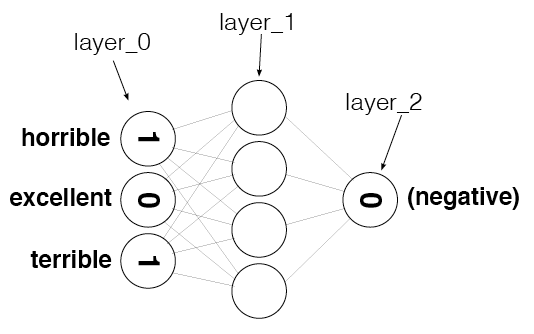

In [1]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [ ]:
# TODO: Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
layer_0 = None

Run the following cell. It should display `(1, 74074)`

In [ ]:
layer_0.shape

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [ ]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [ ]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # TODO: count how many times each word is used in the given review and store the results in layer_0 

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [ ]:
update_input_layer(reviews[0])
layer_0

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [ ]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [ ]:
labels[0]

In [ ]:
get_target_for_label(labels[0])

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [ ]:
labels[1]

In [ ]:
get_target_for_label(labels[1])

# End of Project 2. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Project 3: Building a Neural Network<a id='project_3'></a>

**TODO:** We've included the framework of a class called `SentimentNetork`. Implement all of the items marked `TODO` in the code. These include doing the following:
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

### Where to Get Help if You Need it
- Re-watch earlier Udacity lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [ ]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # TODO: populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # TODO: populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # TODO: populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # TODO: do the same thing you did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        # TODO: initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = None
        
        # TODO: initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = None
        
        # TODO: Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # TODO: You can copy most of the code you wrote for update_input_layer 
        #       earlier in this notebook. 
        #
        #       However, MAKE SURE YOU CHANGE ALL VARIABLES TO REFERENCE
        #       THE VERSIONS STORED IN THIS OBJECT, NOT THE GLOBAL OBJECTS.
        #       For example, replace "layer_0 *= 0" with "self.layer_0 *= 0"
        pass
                
    def get_target_for_label(self,label):
        # TODO: Copy the code you wrote for get_target_for_label 
        #       earlier in this notebook. 
        pass
        
    def sigmoid(self,x):
        # TODO: Return the result of calculating the sigmoid activation function
        #       shown in the lectures
        pass
    
    def sigmoid_output_2_derivative(self,output):
        # TODO: Return the derivative of the sigmoid activation function, 
        #       where "output" is the original output from the sigmoid fucntion 
        pass

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # TODO: Get the next review and its correct label
            
            # TODO: Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            
            # TODO: Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # TODO: Run a forward pass through the network, like you did in the
        #       "train" function. That means use the given review to 
        #       update the input layer, then calculate values for the hidden layer,
        #       and finally calculate the output layer.
        #
        #       Note: The review passed into this function for prediction 
        #             might come from anywhere, so you should convert it 
        #             to lower case prior to using it.
        
        # TODO: The output layer should now contain a prediction. 
        #       Return `POSITIVE` for predictions greater-than-or-equal-to `0.5`, 
        #       and `NEGATIVE` otherwise.
        pass


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [ ]:
mlp.train(reviews[:-1000],labels[:-1000])

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# End of Project 3. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

The following cells include includes the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Project 4: Reducing Noise in Our Input Data<a id='project_4'></a>

**TODO:** Attempt to reduce the noise in the input data like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times each word is used, but rather just stores whether or not a word was used. 

In [ ]:
# TODO: -Copy the SentimentNetwork class from Projet 3 lesson
#       -Modify it to reduce noise, like in the video 

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 4. 
## Andrew's solution was actually in the previous video, so rewatch that video if you had any problems with that project. Then continue on to the next lesson.
# Analyzing Inefficiencies in our Network<a id='lesson_5'></a>
The following cells include the code Andrew shows in the next video. We've included it here so you can run the cells along with the video without having to type in everything.

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
layer_0 = np.zeros(10)

In [ ]:
layer_0

In [ ]:
layer_0[4] = 1
layer_0[9] = 1

In [ ]:
layer_0

In [ ]:
weights_0_1 = np.random.randn(10,5)

In [ ]:
layer_0.dot(weights_0_1)

In [ ]:
indices = [4,9]

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [ ]:
layer_1

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
layer_1 = np.zeros(5)

In [ ]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [ ]:
layer_1

# Project 5: Making our Network More Efficient<a id='project_5'></a>
**TODO:** Make the `SentimentNetwork` class more efficient by eliminating unnecessary multiplications and additions that occur during forward and backward propagation. To do that, you can do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Remove the `update_input_layer` function - you will not need it in this version.
* Modify `init_network`:
>* You no longer need a separate input layer, so remove any mention of `self.layer_0`
>* You will be dealing with the old hidden layer more directly, so create `self.layer_1`, a two-dimensional matrix with shape 1 x hidden_nodes, with all values initialized to zero
* Modify `train`:
>* Change the name of the input parameter `training_reviews` to `training_reviews_raw`. This will help with the next step.
>* At the beginning of the function, you'll want to preprocess your reviews to convert them to a list of indices (from `word2index`) that are actually used in the review. This is equivalent to what you saw in the video when Andrew set specific indices to 1. Your code should create a local `list` variable named `training_reviews` that should contain a `list` for each review in `training_reviews_raw`. Those lists should contain the indices for words found in the review.
>* Remove call to `update_input_layer`
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* In the forward pass, replace the code that updates `layer_1` with new logic that only adds the weights for the indices used in the review.
>* When updating `weights_0_1`, only update the individual weights that were used in the forward pass.
* Modify `run`:
>* Remove call to `update_input_layer` 
>* Use `self`'s  `layer_1` instead of a local `layer_1` object.
>* Much like you did in `train`, you will need to pre-process the `review` so you can work with word indices, then update `layer_1` by adding weights for the indices used in the review.

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 4 lesson
#       -Modify it according to the above instructions 

Run the following cell to recreate the network and train it once again.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 5. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.
# Further Noise Reduction<a id='lesson_6'></a>

In [ ]:
Image(filename='sentiment_network_sparse_2.png')

In [ ]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

In [ ]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

In [ ]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [ ]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

# Project 6: Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. Specifically, do the following:
* Copy the `SentimentNetwork` class from the previous project into the following cell.
* Modify `pre_process_data`:
>* Add two additional parameters: `min_count` and `polarity_cutoff`
>* Calculate the positive-to-negative ratios of words used in the reviews. (You can use code you've written elsewhere in the notebook, but we are moving it into the class like we did with other helper code earlier.)
>* Andrew's solution only calculates a postive-to-negative ratio for words that occur at least 50 times. This keeps the network from attributing too much sentiment to rarer words. You can choose to add this to your solution if you would like.  
>* Change so words are only added to the vocabulary if they occur in the vocabulary more than `min_count` times.
>* Change so words are only added to the vocabulary if the absolute value of their postive-to-negative ratio is at least `polarity_cutoff`
* Modify `__init__`:
>* Add the same two parameters (`min_count` and `polarity_cutoff`) and use them when you call `pre_process_data`

In [ ]:
# TODO: -Copy the SentimentNetwork class from Project 5 lesson
#       -Modify it according to the above instructions 

Run the following cell to train your network with a small polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance. It should be 

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

Run the following cell to train your network with a much larger polarity cutoff.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

And run the following cell to test it's performance.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

# End of Project 6. 
## Watch the next video to see Andrew's solution, then continue on to the next lesson.

# Analysis: What's Going on in the Weights?<a id='lesson_7'></a>

In [ ]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [ ]:
mlp_full.train(reviews[:-1000],labels[:-1000])

In [ ]:
Image(filename='sentiment_network_sparse.png')

In [ ]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [ ]:
get_most_similar_words("excellent")

In [ ]:
get_most_similar_words("terrible")

In [ ]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [ ]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [ ]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words